# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points from the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are four different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-5 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
4. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). **However**, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient!

**Q&A**

Q: If the task is to implement a mean function, may I just call ```np.mean()```? 
<br>A: No.

Q: If the task is to compare the mean of X and Y, may I use ```np.mean()``` to calculate the mean?
<br>A: Yes.

Q: If I have implemented a mean function in a previous task, but I am unsure of its correctness, may I use ```np.mean()``` in following task where mean is used as a helper function? 
<br>A: Yes.

Q: May I use ```np.mean()``` to debug my implementation of mean?
<br>A: Yes.

Q: Do I get 0 points for a task if I skip it?
<br>A: Yes.

Q: Can I get partial points for a task I did partially correct?
<br>A: Yes.

Q: Is it OK to skip a task if I do not need the points from it?
<br>A: Yes.

Q: Should I inform a TA if I find an error?
<br>A: Yes.

Q: Should I ask questions if I am confused?
<br>A: Yes.



Good luck!

In [1]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns

RANDOM_SEED = 132419
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("./data/dota2.csv")
color_map = {'Intelligence':'Blue', 'Universal':'Yellow', 'Agility':'Green', 'Strength':'Red'}
toy = df[df['A'].isin(['Agility', 'Strength'])].sample(n=10, random_state=RANDOM_SEED)

# Part 1 Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (25, 12) and (21,20)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


(19.65, 27.35, 9.2, 26.8)

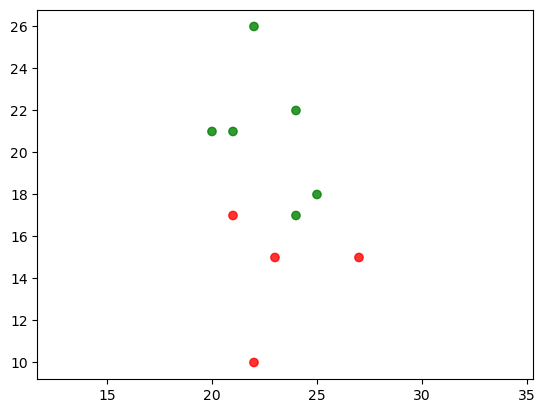

In [2]:
first = 'STR'
last = 'AGI'

X_kmeans = toy[[first, last]]

plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.8, c=toy['A'].map(color_map))
plt.axis('equal')

*******************
**YOUR ANSWER HERE**

Using Lloyd's Algorithm.

We assign the points to the cluster with the nearest centroid (using euclidean distance). The class $j$ for point $\mathbf{x}$ can be assigned by (for 2 dimensions):

$$
j = \arg \min_{i} || \mathbf{x} - \mathbf{\mu}_i || =  \arg \min_{i}  \sqrt{(x_1 - \mu_{i, 1})^2 + (x_2 - \mu_{i, 2})^2}
$$

As an example, we use the point $\mathbf{x} = $ `(21, 21)`. The cluster with centroid in (25, 12) is named cluster 1, and cluster with centroid in (21, 20) is named clutser 2.

\begin{aligned}
\text{Distance to Cluster 1} = \sqrt{(25 - 21)^2 + (12 - 21)^2} \approx 9.85; && \text{Distance to Cluster 2} = \sqrt{(21 - 21)^2 + (20 - 21)^2} = 1.0
\end{aligned}

Since cluster 2 with centroid (21, 20) has the smallest distance to $\mathbf{x}$, $\mathbf{x}$ is assigned to cluster 2.

The remaining points are assigned using the same method. Computations are omitted.



\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 9.85 & 1.0 \\
(27, 15) & \text{Cluster 1} & 3.61 & 7.81 \\
(22, 10) & \text{Cluster 1} & 3.61 & 10.05 \\
(25, 18) & \text{Cluster 2} & 6.0 & 4.47 \\
(24, 17) & \text{Cluster 2} & 5.10 & 4.24 \\
(24, 22) & \text{Cluster 2} & 10.05 & 3.61 \\
(23, 15) & \text{Cluster 1} & 3.61 & 5.39 \\
(20, 21) & \text{Cluster 2} & 10.3 & 1.41 \\
(21, 17) & \text{Cluster 2} & 6.4 & 3.0 \\
(22, 26) & \text{Cluster 2} & 14.32 & 6.08 \\
\end{array}


With the points assigned, we compute the new centroids for each cluster. The centroids are computed using: 

$$
\mathbf{\mu}_i = \frac{1}{|C_i|} \sum_{\mathbf{x} \in C_i} \mathbf{x}
$$

As an example we will compute the centroid for cluster 1

$$
\mathbf{\mu}_1 = \frac{1}{3} \left( \begin{pmatrix} 27 \\ 15 \end{pmatrix} + \begin{pmatrix} 22 \\ 10 \end{pmatrix} + \begin{pmatrix} 23 \\ 15 \end{pmatrix} \right) = \frac{1}{3} \begin{pmatrix} 27 \\ 40 \end{pmatrix} =  \begin{pmatrix} 24.0 \\ 13.33 \end{pmatrix} 
$$

Computations for cluster 2 are omitted, but follow the same procedure. The new centroid for clutser 2 is 
$$
\mathbf{\mu}_2 = \begin{pmatrix} 22.43 \\ 20.29 \end{pmatrix}
$$

With the new centroids, we re-compute the cluster assignment of the points using the same method as before. The new assignments are:

\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 8.23 & 1.6 \\
(27, 15) & \text{Cluster 1} & 3.43 & 6.99 \\
(22, 10) & \text{Cluster 1} & 3.89 & 10.29 \\
(25, 18) & \text{Cluster 2} & 4.77 & 3.44 \\
(24, 17) & \text{Cluster 2} & 3.67 & 3.64 \\
(24, 22) & \text{Cluster 2} & 8.67 & 2.33 \\
(23, 15) & \text{Cluster 1} & 1.94 & 5.32 \\
(20, 21) & \text{Cluster 2} & 8.65 & 2.53 \\
(21, 17) & \text{Cluster 2} & 4.74 & 3.58 \\
(22, 26) & \text{Cluster 2} & 12.82 & 5.73 \\
\end{array}

As the cluster assignment has not changed, neither will the centroid coordinates and the algorithm has converged. The above cluster assignment is the final assignment.

******************

Point Assignments:
[2 1 1 2 2 2 1 2 2 2]


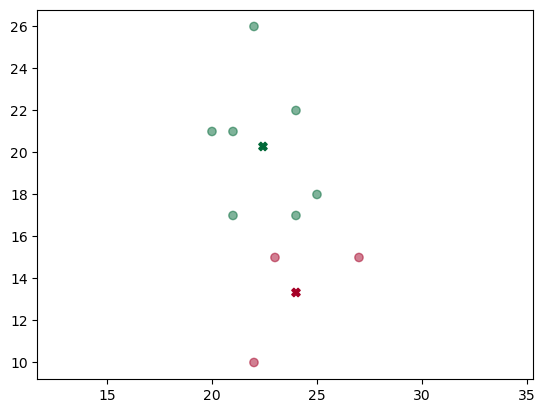

In [3]:
### Just to visualize 

points = np.array(X_kmeans)

centroid1 = np.array([25, 12])
centroid2 = np.array([21, 20])
distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])

assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1

centroid1 = np.mean(np.array(X_kmeans)[np.where(assignments == 1)], axis=0)
centroid2 = np.mean(np.array(X_kmeans)[np.where(assignments == 2)], axis=0)

distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])
assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1

plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.5, c=assignments, cmap='RdYlGn')
plt.scatter([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], alpha = 1, marker='X', c=[3, 4], label='Centroids', cmap='RdYlGn')
plt.axis('equal')

plt.savefig('figures/task1.1.1.png')

print("Point Assignments:")
print(assignments)

### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************

##### Example 1

Using the previous task as an example, if we initate the centroids with following coordinates, we end up with a different final clustering: 
$$
\begin{align*}
\mathbf{\mu}_1 = \begin{pmatrix} 25 \\ 16 \end{pmatrix} && \mathbf{\mu}_2 = \begin{pmatrix} 21 \\ 24 \end{pmatrix}
\end{align*}
$$

Using the same algorithm/approach as shown in task 1.1.1, we get the following cluster assignment using the initial centroids: 


\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 6.4 & 3.0 \\
(27, 15) & \text{Cluster 1} & 2.24 & 10.82 \\
(22, 10) & \text{Cluster 1} & 6.71 & 14.04 \\
(25, 18) & \text{Cluster 1} & 2.0 & 7.21 \\
(24, 17) & \text{Cluster 1} & 1.41 & 7.62 \\
(24, 22) & \text{Cluster 2} & 6.08 & 3.61 \\
(23, 15) & \text{Cluster 1} & 2.24 & 9.22 \\
(20, 21) & \text{Cluster 2} & 7.07 & 3.16 \\
(21, 17) & \text{Cluster 1} & 4.12 & 7.0 \\
(22, 26) & \text{Cluster 2} & 10.44 & 2.24 \\
\end{array}

Using the cluster assignment, we reevaluate our centroid values and get the following: 

$$
\begin{align*}
\mathbf{\mu}_1 = \begin{pmatrix} 23.67 \\ 15.33 \end{pmatrix} && \mathbf{\mu}_2 = \begin{pmatrix} 21.75 \\ 22.5 \end{pmatrix}
\end{align*}
$$

Once again, we compute the cluster assignment using the new points:

\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 6.26 & 1.68 \\
(27, 15) & \text{Cluster 1} & 3.35 & 9.15 \\
(22, 10) & \text{Cluster 1} & 5.59 & 12.5 \\
(25, 18) & \text{Cluster 1} & 2.98 & 5.55 \\
(24, 17) & \text{Cluster 1} & 1.7 & 5.94 \\
(24, 22) & \text{Cluster 2} & 6.67 & 2.3 \\
(23, 15) & \text{Cluster 1} & 0.75 & 7.6 \\
(20, 21) & \text{Cluster 2} & 6.75 & 2.3 \\
(21, 17) & \text{Cluster 1} & 3.14 & 5.55 \\
(22, 26) & \text{Cluster 2} & 10.8 & 3.51 \\
\end{array}

Since the cluster assignmet hasn't changed, neither will the centroid values. Hence our algorithm has converged.
As shown, we get a different clustering than in the previous task.




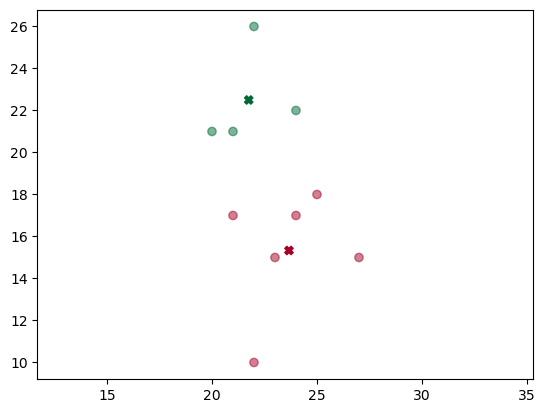

In [4]:
## Just to visualize

points = np.array(X_kmeans)

centroid1 = np.array([25, 16])
centroid2 = np.array([21, 24])
distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])

assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1

centroid1 = np.mean(np.array(X_kmeans)[np.where(assignments == 1)], axis=0)
centroid2 = np.mean(np.array(X_kmeans)[np.where(assignments == 2)], axis=0)


distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])
assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1


plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.5, c=assignments, cmap='RdYlGn')
plt.scatter([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], alpha = 1, marker='X', c=[3, 4], label='Centroids', cmap='RdYlGn')
plt.axis('equal')

plt.savefig('figures/task1.1.2_example1.png')


##### Example 2

As a very simple example, we have a one dimensional data set consisting of the points (1, 2, 4, 6, 8, 9, 10, 12)

We compute to different assigments using two different cluster initializations:

Centroid 1 = 2, centroid 2 = 9

Centroid 1 = 5, centroid 2 = 10


Cluster assigment using euclidean distance in one dimension becomes:

$$
j =   \arg \min_{i}  |x - \mu_{i, 1}|
$$

Using the measure above, we get the following assigments for the data points:
$$
\begin{array}{|cccccc|}
\text{Point} & \text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
1 & \text{Cluster 1} & 1 & 8 \\
2 & \text{Cluster 1} & 0 & 7 \\
4 & \text{Cluster 1} & 2 & 5 \\
6 & \text{Cluster 2} & 4 & 3 \\
8 & \text{Cluster 2} & 6 & 1 \\
9 & \text{Cluster 2} & 7 & 0 \\
10 & \text{Cluster 2} & 8 & 1 \\
12 & \text{Cluster 2} & 10 & 3 \\
\end{array} \quad 

\begin{array}{|cccccc|}
\text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
\text{Cluster 1} & 4 & 9 \\
\text{Cluster 1} & 3 & 8 \\
\text{Cluster 1} & 1 & 6 \\
\text{Cluster 1} & 1 & 4 \\
\text{Cluster 2} & 3 & 2 \\
\text{Cluster 2} & 4 & 1 \\
\text{Cluster 2} & 5 & 0 \\
\text{Cluster 2} & 7 & 2 \\
\end{array}
$$

Updating the cluster centroids for the different initializations, we get: 

Centroid 1 = 2.33, centroid 2 = 9

Centroid 1 = 3.25, centroid 2 = 9.75

Re-computing the cluster assignments, we obtain: 

$$
\begin{array}{|cccccc|}
\text{Point} & \text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
1 & \text{Cluster 1} & 1.33 & 8 \\
2 & \text{Cluster 1} & 0.33 & 7 \\
4 & \text{Cluster 1} & 1.67 & 5 \\
6 & \text{Cluster 2} & 3.67 & 3 \\
8 & \text{Cluster 2} & 5.67 & 1 \\
9 & \text{Cluster 2} & 6.67 & 0 \\
10 & \text{Cluster 2} & 7.67 & 1 \\
12 & \text{Cluster 2} & 9.67 & 3 \\
\end{array} \quad 

\begin{array}{|cccccc|}
\text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
\text{Cluster 1} & 2.25 & 8.75 \\
\text{Cluster 1} & 1.25 & 7.75 \\
\text{Cluster 1} & 0.75 & 5.75 \\
\text{Cluster 1} & 2.75 & 3.75 \\
\text{Cluster 2} & 4.75 & 1.75 \\
\text{Cluster 2} & 5.75 & 0.75 \\
\text{Cluster 2} & 6.75 & 0.25 \\
\text{Cluster 2} & 8.75 & 2.25 \\
\end{array}
$$

As shown above, the cluster assignment has not changed, and so our algorithm has converged.
The two initilizations result in different clusterings, where the assignment of the point $x=6$ depends on the initialization.

******************

(0.44999999999999996, 12.55, 0.945, 1.0550000000000002)

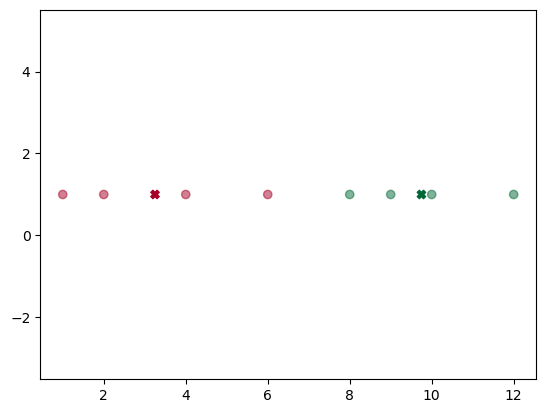

In [5]:
X_1d_1 = np.array([1, 2, 4, 6, 8, 9, 10, 12])
 
X_1d_2 = np.ones_like(X_1d_1)

initial_centroids = np.array([[8], [12]])

kmeans = KMeans(n_clusters=2, init=initial_centroids)

# Fit the KMeans model to your data
kmeans.fit(X_1d_1.reshape(-1, 1))


# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_


plt.scatter(X_1d_1, X_1d_2, alpha=0.5, c=cluster_assignments, cmap='RdYlGn')
plt.scatter(centroids, np.ones_like(centroids), alpha = 1, marker='X', c=[3, 4], label='Centroids', cmap='RdYlGn')
plt.axis('equal')


<span style='color: green'>**\[Motivate\]**</span> <br>
B) How do you explain the difference between the two cluster assignments in point A)?

*******************
Kmeans result in different clusterings due to the algorithm converging to different local minima, which depends on initalization. As seen by the examples, even though there may be a more optimal clustering that would globally minimize the distances from points to clusters, the algorithm seeks out to minimize the objective function by 'simply' assigning a point to the nearest cluster. So even if an optimal solution exists by assigning points that are further away to the cluster and moving the centroid significantly, this will not happen if this assingment includes temporarily assigning a point to a cluster that is not the immediate nearest. 
******************

### Task 1.1.3 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

*******************
We are working with an agglomerative method so all points are asigned to their own clusters. 

Iteratively, we find the closest two clusters and merge them until there is only one cluster. We use average link to find the distance between two clusters: 
$$\operatorname{dist}_{a l}\left(C_i, C_j\right)=\frac{1}{\left|C_i\right|\left|C_j\right|} \operatorname{dist}(\mathbf{x}, \mathbf{y})$$

Since every cluster at this point contains a single data point, we simply combine the two data points closest to each other into a cluster.  

The initial distance matrix: 
$$
\begin{array}{c |cccccccccc}
    & (21, 21) & (27, 15) & (22, 10) & (25, 18) & (24, 17) & (24, 22) & (23, 15) & (20, 21) & (21, 17) & (22, 26) \\
    \hline
        (21, 21) & - & - & - & - & - & - & - & - & - & - \\
        (27, 15) & 8.49 & - & - & - & - & - & - & - & - & - \\
        (22, 10) & 11.05 & 7.07 & - & - & - & - & - & - & - & - \\
        (25, 18) & 5 & 3.61 & 8.54 & - & - & - & - & - & - & - \\
        (24, 17) & 5 & 3.61 & 7.28 & 1.41 & - & - & - & - & - & - \\
        (24, 22) & 3.16 & 7.62 & 12.17 & 4.12 & 5 & - & - & - & - & - \\
        (23, 15) & 6.32 & 4 & 5.10 & 3.61 & 2.24 & 7.07 & - & - & - & - \\
        (20, 21) & \textcolor{green}{1} & 9.22 & 11.18 & 5.83 & 5.66 & 4.12 & 6.71 & - & - & - \\
        (21, 17) & 4 & 6.32 & 7.07 & 4.12 & 3 & 5.83 & 2.83 & 4.12 & - & - \\
        (22, 26) & 5.10 & 12.08 & 16 & 8.54 & 9.22 & 4.47 & 11.05 & 5.39 & 9.06 & - \\
\end{array}
$$

we see that (21,21) and (20,21) are the closest two, so we merge them into $C_0$ and take note of the distance.

For the second iteration, when we calculate distances between clusters with more than one point, we have to average the distances between each element in the first cluster and each element in the second cluster.  

For instance, the distance between $C_0= [(21,21),(20,21)]$ and $C_8=[(21,17)]$ is
$$dist_{al}(C_0,C_{9})=\frac{1}{2\cdot 1}\cdot (4 + 4.2) = 8.1$$
Doing these calculations, we get the distance matrix at the next iteration:


$$
\begin{array}{c | ccccccccc}
    & C_0 & (27, 15) & (22, 10) & (25, 18) & (24, 17) & (24, 22) & (23, 15) & (21, 17) & (22, 26) \\
 \\
    \hline
        C_0 & - & - & - & - & - & - & - & - & - \\
        (27, 15) & 8.86 & - & - & - & - & - & - & - & - \\
        (22, 10) & 11.12 & 7.07 & - & - & - & - & -  & - & - \\
        (25, 18) & 5.42 & 3.61 & 8.54 & - & - & - & - & -  & - \\
        (24, 17) & 5.33 & 3.61 & 7.28 & \textcolor{green}{1.41} & - & - & - & - & - \\
        (24, 22) & 3.64 & 7.62 & 12.17 & 4.12 & 5 & - & - & - & - \\
        (23, 15) & 6.52 & 4 & 5.10 & 3.61 & 2.24 & 7.07 & - & - & - \\
        (21, 17) & 4.06 & 6.32 & 7.07 & 4.12 & 3 & 5.83 & 2.83 &  - & - \\
        (22, 26) & 5.24 & 12.08 & 16 & 8.54 & 9.22 & 4.47 & 11.05 &  9.06 & - \\
\end{array}
$$

Again we merge the clusters with the shortest distance between, and note the distance. We continue doing this until all clusters are merged:

| Iteration number | Cluster i | Cluster j | Distance | Points in cluster |
|------------------|-----------|-----------|----------|-------------------|
| 1                | 0         | 7         | 1        | 2                 |
| 2                | 3         | 4         | 1.414    | 2                 |
| 3                | 6         | 8         | 2.828    | 2                 |
| 4                | 11        | 12        | 3.241    | 4                 |
| 5                | 5         | 10        | 3.643    | 3                 |
| 6                | 1         | 13        | 4.384    | 5                 |
| 7                | 9         | 14        | 4.985    | 4                 |
| 8                | 15        | 16        | 6.997    | 9                 |
| 9                | 2         | 17        | 9.495    | 10                |


We now draw a dendogram. All the leaves are the initial points and are placed at y=0. 

Then we merge the clusters by connecting leaves at the height equal to the distance bewteen the clusters.

This gives us the following dendogram:

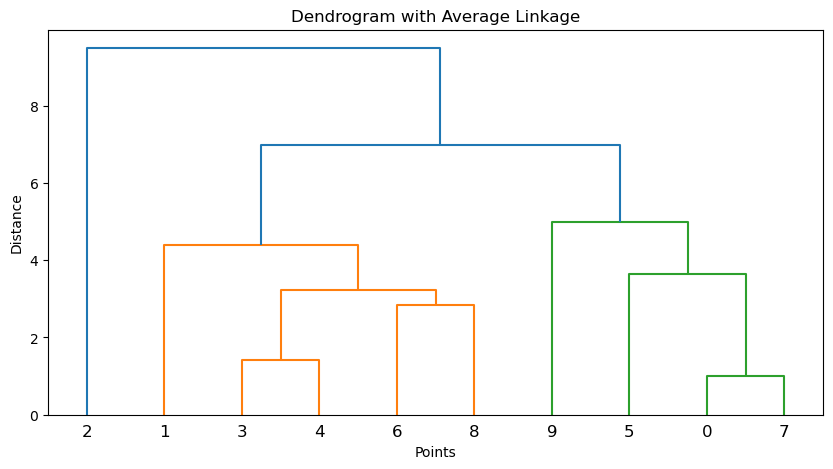

******************

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering DBSCAN for the dataset of Task 1.1.1 using $\epsilon=3.5$ and $MinPts=2$. Present at least 2 iterations of the algorithm.<br> 


*******************
The algorithim is as follows:
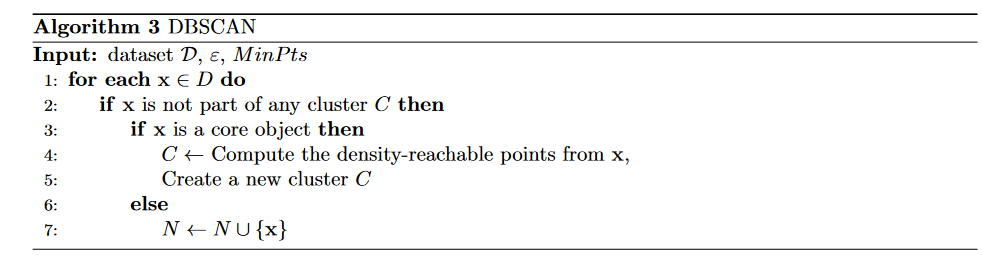

We can use the distance matrix from 1.1.3. to determine distances

**Iteration 1:**

If we first look at $x_0=(21,21)$, which is not part of a cluster.  
We see that both $x_5=(24,22)$ and $x_7=(20,21)$ are within $\epsilon=3.5$.                     
Since $3 \geq MinPts=2$ $x_0$ is a core object.                                                                 
Therefore we compute the density reachable points from $x_0$:                       
Since no other points can be reached from either $x_0$, $x_5$, or $x_{7}$, we cluster exactly these points together.

**Iteration 2:**

We now look at $x_1=(27,15)$, which is not part of a cluster.                                   
We see that no other points are within $\epsilon=3.5$ of $x_1$, and it is thus not a core object.
We thus assign $x_1$ to NOISE, $N$.  


We continue until we have been though all 10 points. 

The result is two clusters; $C_0={x_0,x_5,x_7}$ and $C_1={x_3,x_4,x_6,x_8}$, as well as the noise cluster $N={x_1,x_2,x_9}$
******************


B) <span style='color: green'>**\[Motivate\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1.

*******************
We get 2 clusters again but with DBSCAN the clusters are more dense since we allocate some points to noise.
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Motivate\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [X] Angle based approach
- [ ] Depth based approach

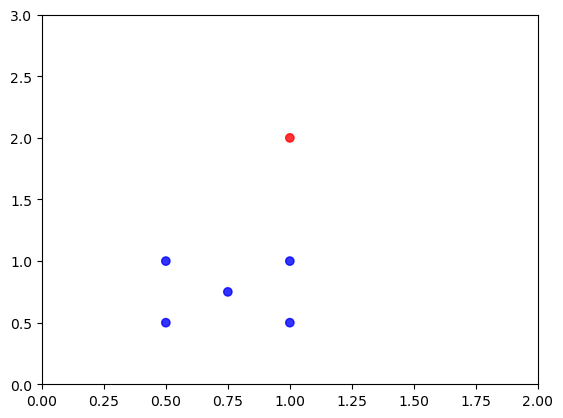

In [6]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
plt.show()

*******************
1)    The distance-based methodology, with parameters $\pi=0.5$, $\epsilon=2$, and using Euclidean distance, would fail to identify the red outlier. This is beacause all points, including the outlier, reside within the $\epsilon$ radius of one another, encompassing more than $\pi$ percentage of the points.

2) Considering the angle-based approach, we see that the outlier point exhibits a narrower range of angles compared to the other points. This enables effective segregation of the outlier.

3) The depth-based approach works under the assumption that typical objects lie within the data space. Consequently, we would be unable to differentiate the outlier from the four other non-central points, that would all lie on the convex hull.

Therefore, the angle-based approach is the preferred choice based on these considerations.
******************

## Task 1.3 Theoretical questions
### Task 1.3.1 Triangle inequality (2 points)
<span style='color: green'>**\[Prove\]**</span> 1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric

*******************
To prove this we need to prove 4 properties:
1)  $dist(x,y)\geq 0$
2)  $dist(x,y) = 0 \Leftrightarrow x=y$
3)  $dist(x,y)=dist(y,x)$
4)  $dist(x,z) \leq dist(x,y) + dist(y,z)$

First one is true since we find the absolute difference between x and y.

Sencond one is also true since the distance can only reach 0 when x=y.

Third one is true again because it is the absolute difference; x-y might be different to y-x, but $|x-y|=|y-x|$

Forth one is also true since  $d(x,z) = |x-z| \leq |x-y| + |y-z| = d(x,y) + d(y,z)$

Since it satisfies all properties, it is a metric
******************

<span style='color: green'>**\[Prove\]**</span> 2. If $d(p_1,p_2)\leq\frac{d(p_2,p_3)}{2}$, then $d(p_1,p_2)\leq d(p_1,p_3)$

*******************

Using the traingle inequality on $\frac{d(p_3, p_2)}{2}$, we get:
$$
\begin{aligned}
d(p_1, p_2) \leq \frac{d(p_3, p_2)}{2} \leq \frac{d(p_3, p_1)}{2} + \frac{d(p_1, p_2)}{2} \\
\end{aligned}
$$
Or just: 
$$
\begin{aligned}
d(p_1, p_2) \leq \frac{d(p_3, p_1)}{2} + \frac{d(p_1, p_2)}{2} \\
\end{aligned}
$$
Re-writing the equality we get:
$$
\begin{aligned}
2d(p_1, p_2) &\leq d(p_3, p_1) + d(p_1, p_2) && \text{(multiply by 2)}\\
d(p_1, p_2)  &\leq d(p_3, p_1) && \text{(subdstract }d(p_1, p_2)\text{ from both sides)}
\end{aligned}
$$

Thereby we have shown if $d(p_1,p_2)\leq\frac{d(p_2,p_3)}{2}$, then $d(p_1,p_2)\leq d(p_1,p_3)$
******************

### Task 1.3.2 Kernel trick (9 points)
<span style='color: green'>**\[Motivation\]**</span> A) What is a positive-definite kernel $K(x,x')$ of two vectors $x,x'\in\mathbb{R}^n$. 

*******************
$K$ is a positive semidefinite kernel of two vectors if and only if it is symmetric, ie:

$$
\begin{align}
\tag{1}
K(\mathbf{x}_i, \mathbf{x}_j) = K(\mathbf{x}_j, \mathbf{x}_i)
\end{align} 
$$

and if the corresponding kernel matrix $\mathbf{K}$ evaluated on any set of points in the input space is positive definte, that is
$$
\mathbf{a}^T \mathbf{K}\mathbf{a} \geq 0 \text{ for all vectors } \mathbf{a} \in \R^n
$$ 
which implies: 

$$
\begin{align}
\tag{2}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K(\mathbf{x}_i, \mathbf{x}_j) \geq 0, \quad \text{for all } a_i \in \R, i \in [1, n] 
\end{align}
$$

******************

<span style='color: green'>**\[Motivate\]**</span> B) Please explain briefly what is the kernel trick method.

*******************
                                                                
Instead of working with the original input features of the data, the kernel trick method consists of transforming the data by a kernel function andrepresenting the data by a kernel matrix $\mathbf{K}$, and using the kernel matrix for all relevant analysis.

******************

<span style='color: green'>**\[Prove\]**</span> C)
Let two positive-definite kernels $K_1(x,x')$ and $K_2(x,x')$.  <br> Show that functions $K_1(x,x')+K_2(x,x')$ and $K_1(x,x')K_2(x,x')$ are also positive-definite kernels.

*******************

Since $K_1$ and $K_2$ individually satisfy the properties of a positive-definite kernel, ie:

$$
\begin{aligned}
\tag{3}
K(x, x') = K(x', x), && \quad \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K(\mathbf{x}_i, \mathbf{x}_j) \geq 0, \quad \text{for all } a_i \in \R, i \in [1, n]
\end{aligned}
$$
For both $K_1$ and $K_2$, we can show that the sum of two positive definite kernels will also be symmetric. We define $K_s(x, x')$ as the sum, whereby we get:

$$
\begin{aligned}
K_s(x,x') = K_1(x, x') + K_2(x, x') = K_1(x', x) + K(x', x) = K_s(x', x)
\end{aligned}
$$

By using the symmetry of the individual kernels. Moreover we can show the kernel sum $K_s(x, x')$ will also be positive definite by: 

$$
\begin{aligned}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_s(\mathbf{x}_i, \mathbf{x}_j)  
    &= \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j \left( K_1(\mathbf{x}_i, \mathbf{x}_j) + K_2(\mathbf{x}_i, \mathbf{x}_j) \right) \\
    &=\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j  K_1(\mathbf{x}_i, \mathbf{x}_j) + \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j  K_2(\mathbf{x}_i, \mathbf{x}_j)
\end{aligned}
$$

Since both $K_1$ and $K_2$ are positive definite as shown in eq. (3), both terms on the right hand side are non-negative, and therefore the sum will also be non-negative, meaning: 
$$
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_s(\mathbf{x}_i, \mathbf{x}_j) \geq 0
$$

Likewise for the product of two kernels, we can show this produces as symmetric kernel, $K_p$:

$$
\begin{aligned}
K_p(x, x') = K_1(x, x')\cdot K_2(x, x') = K_1(x', x)  \cdot K_2(x', x) = K_p(x', x)
\end{aligned}
$$

Since $K_1$ and $K_2$ are symmetric, and the scalar product is a symmetric operator, we get that $K_p$, the product between two kernels is also symmetric. 

Next, we can show that the product of two positive definite kernels is also positve definite:

$$
\begin{aligned}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_p(\mathbf{x}_i, \mathbf{x}_j)  
    &= \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j \left( K_1(\mathbf{x}_i, \mathbf{x}_j) \cdot K_2(\mathbf{x}_i, \mathbf{x}_j) \right) 
\end{aligned}
$$

Since both $K_1$ and $K_2$ are positive definite kernels, the product $K_1(\mathbf{x}_i, \mathbf{x}_j) \cdot K_2(\mathbf{x}_i, \mathbf{x}_j)$ will also be positive definite/non-negative. The sum of many non-negative terms will also be non-negative, and so we obtain: 

$$
\begin{aligned}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_p(\mathbf{x}_i, \mathbf{x}_j)  = \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j \left( K_1(\mathbf{x}_i, \mathbf{x}_j) \cdot K_2(\mathbf{x}_i, \mathbf{x}_j) \right)  \geq 0
\end{aligned}
$$

******************

<span style='color: green'>**\[Prove\]**</span> D) Prove that $K(x,x')=e^{2 ln(x^{\top}x')-(x-x')^{\top}(x-x')}$ is a positive-definite kernel. 

*******************
Firstly, it can be seen that the kernel is symmetric. By slighty re-writing the kernel function, we obtain: 

$$
\begin{align}
K(x, x') = e^{2 \ln (x^T x')} e^{-(x-x')^T(x-x')}
\end{align}
$$
Where the product $x^T x'$ is symmetric, since the dot prodyct is symmetric, hence $\ln (x^T x') = \ln (x'^T x)$ will also be symmetric, and the first term will be symmetric.

Moreover the second term, $(x-x')^T(x - x')$ is symmetric due to being a square product, meaning $(x-x')^T(x - x') = (x'-x)^T(x' - x)$. And so the second term is also symmetric. As shown in the previous task, the product of symmetric kernels will result in a symmetric kernel. 

By further simplyfying the kernel function, we get:
$$
\begin{align}
K(x, x') &= e^{2 \ln (x^T x')} e^{-(x-x')^T(x-x')} \\
    &= (x^Tx')^2 e^{-(x-x')^T(x-x')}
\end{align}
$$

to prove the kernel is positve definite, we must then show that

$$
\begin{align}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_p(\mathbf{x}_i, \mathbf{x}_j) = \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j (x^Tx')^2 e^{-(x-x')^T(x-x')} \geq 0
\end{align}
$$

holds true. It can bee seen that the term $(x^Tx')^2$ is squared and therefore always non-negative. The remaning term $e^{-(x-x')^T(x-x')}$ is an exponential function, that can never be zero nor negative. 
Hence the kernel is a product of two non-negative terms, and therefore will be positive definite. 

******************

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about dota2 heroes check ```datatainfo.md``` for more infomation. 

In [7]:
toy = df
data_np = toy.to_numpy()
headers = ['HERO','A','STR','STR+','STR30','AGI','AGI+','AGI30','INT','INT+','INT30','T','T+','T30','MS','AR','DMG_MIN','DMG_MAX','RG','AS','BAT','ATK_PT','ATK_BS','VS-D','VS-N','TR','COL','HP/S','MP/S','Complexity','Legs','Release','Artifact']
X = data_np[:,2:]
y = data_np[:,1]
rows, cols = np.shape(X)
toy.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,VS-D,VS-N,TR,COL,HP/S,MP/S,Complexity,Legs,Release,Artifact
0,Abaddon,Universal,22,2.2,85.8,23,1.3,60.7,19,1.6,...,1800,800,0.6,27,3.20,1.20,1,2,2005,1
1,Alchemist,Strength,23,2.7,101.3,22,1.5,65.5,25,1.8,...,1800,800,0.6,27,2.55,1.25,1,2,2006,0
2,Ancient Apparition,Intelligence,20,1.9,75.1,20,2.2,83.8,23,3.1,...,1800,800,0.6,27,2.25,1.15,2,0,2009,0
3,Anti-Mage,Agility,19,1.6,65.4,24,2.8,105.2,12,1.8,...,1800,800,0.6,27,2.65,0.60,1,2,2004,0
4,Arc Warden,Agility,22,2.6,97.4,20,3.0,107.0,24,2.6,...,1800,800,0.7,27,2.45,1.20,3,2,2012,0


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

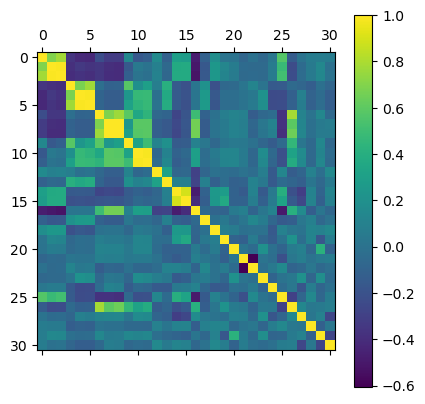

In [8]:
def correlation_matrix(X):
    X = X - np.mean(X, axis=0) # Center data
    S = (X.T @ X)/(len(X) - 1) # Covariance matrix
    V = np.diag(np.diag(S)**(-0.5)) # 1/sqrt(var)
    corr = V @ S @ V # Covariance to correllation cf. multivariate stat. (*)
    return corr.astype(float)
    
Corr = correlation_matrix(X)
plt.matshow(Corr)
plt.colorbar()

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in A), which pair(s) of different features has the highest correlation?

*******************
First we note that we removed two columns so we have to add 2 to the observed column numbers. 

Other that same type, we observe that the columns numbered $\{3,4\}$, $\{6,7\}$, $\{9,10\}$, $\{12,13\}$, and $\{16,17\}$, have close to if not 100% positive correlation.
******************

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two features are highly correlated? <br>

*******************
If two features are positively correlated it means that an increase in one value corresponds to some increase in the other. Such taht a correlation of 1 is equal to a perfect positive linear relationship.
For negative correlation it's just the other way around (i.e. increase -> decrease).
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the features of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
For the columns I highlighted it makes a lot of sense that they are highly/completely correlated since they are different measures of the same characteristics. I.e. STR+/STR30, AGI+/AGI30, INT+/INT30 etc.
******************

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below. (You may need to zoom on it)
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [X] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

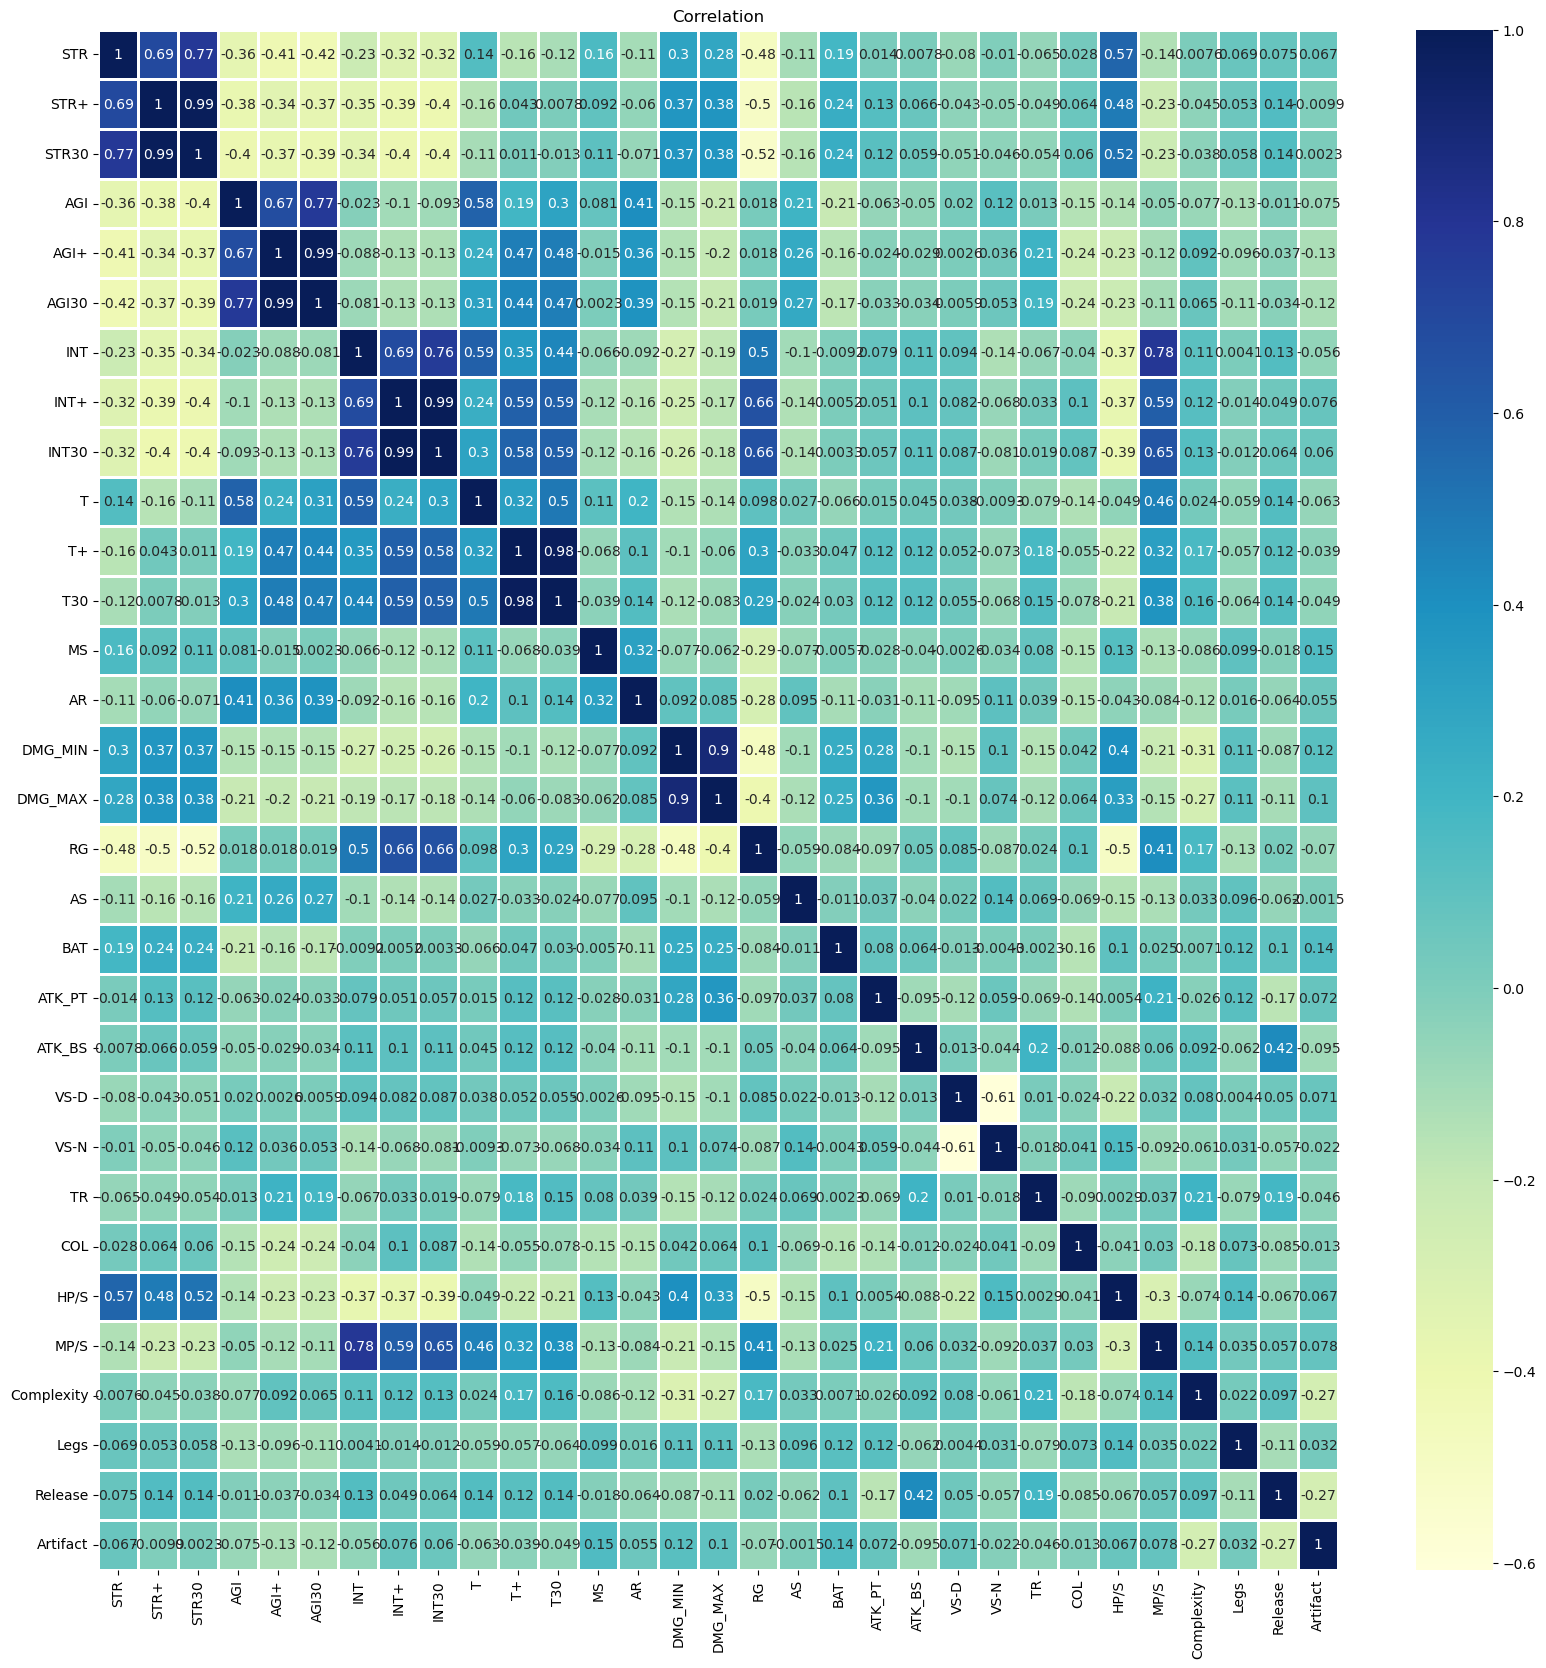

In [9]:
df_to_plot = df.drop(['HERO','A'],axis=1)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_to_plot.corr(),annot=True,linewidths=1, cmap="YlGnBu", annot_kws={"fontsize":10}, vmax=1, ax=ax)
plt.title('Correlation')
plt.show()

*******************
The covariance meassures how much variables change together, but is affected by the scale of the variables. The correlation is a normalized version of the covariance matrix where all covariances are on the same [-1:1] scale. As seen on line 4+5 (*) in 2.1.1 A we divide each row/coloumn by the corresponding variance.
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the dota2 dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

In [10]:
# We define plot function w the code from 2.1.2
# I assume i can use the cov() function now. Otherwise I would have inplemented it as in 2.1.1 A (the first part) 
def plot_covariance(X, title):
    X0 = X - np.mean(X, axis=0) # Center data
    S = (X0.T @ X0)/(len(X0) - 1) # Covariance matrix
    sns.heatmap(np.round(S,1),annot=True,linewidths=1, cmap="YlGnBu", annot_kws={"fontsize":10})
    plt.title(title)
    plt.show()

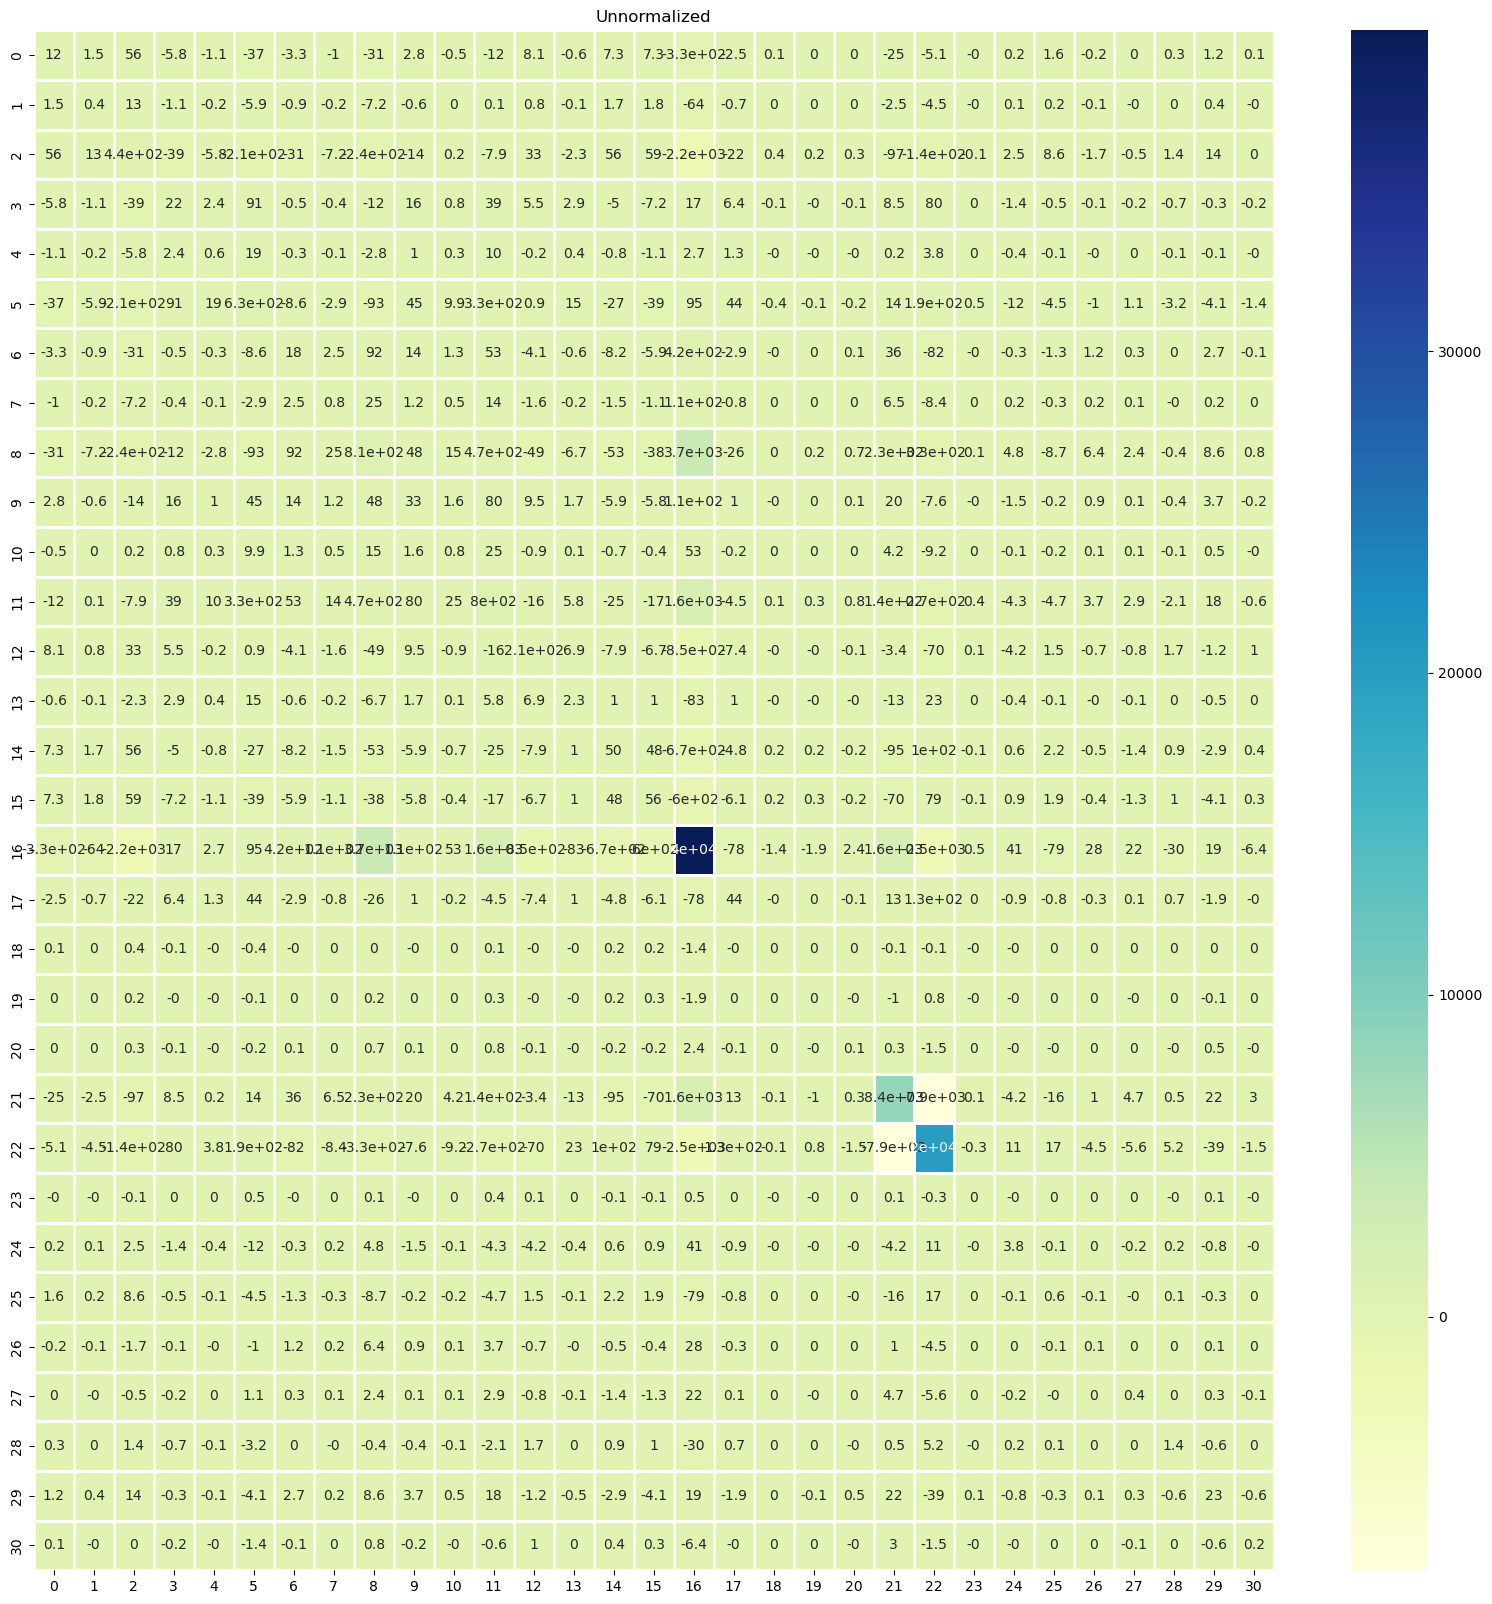

In [11]:
# Data
X = data_np[:,2:].astype(float)

# 1. Unnormalized
fig, ax = plt.subplots(figsize=(20,20))
plot_covariance(X, 'Unnormalized')

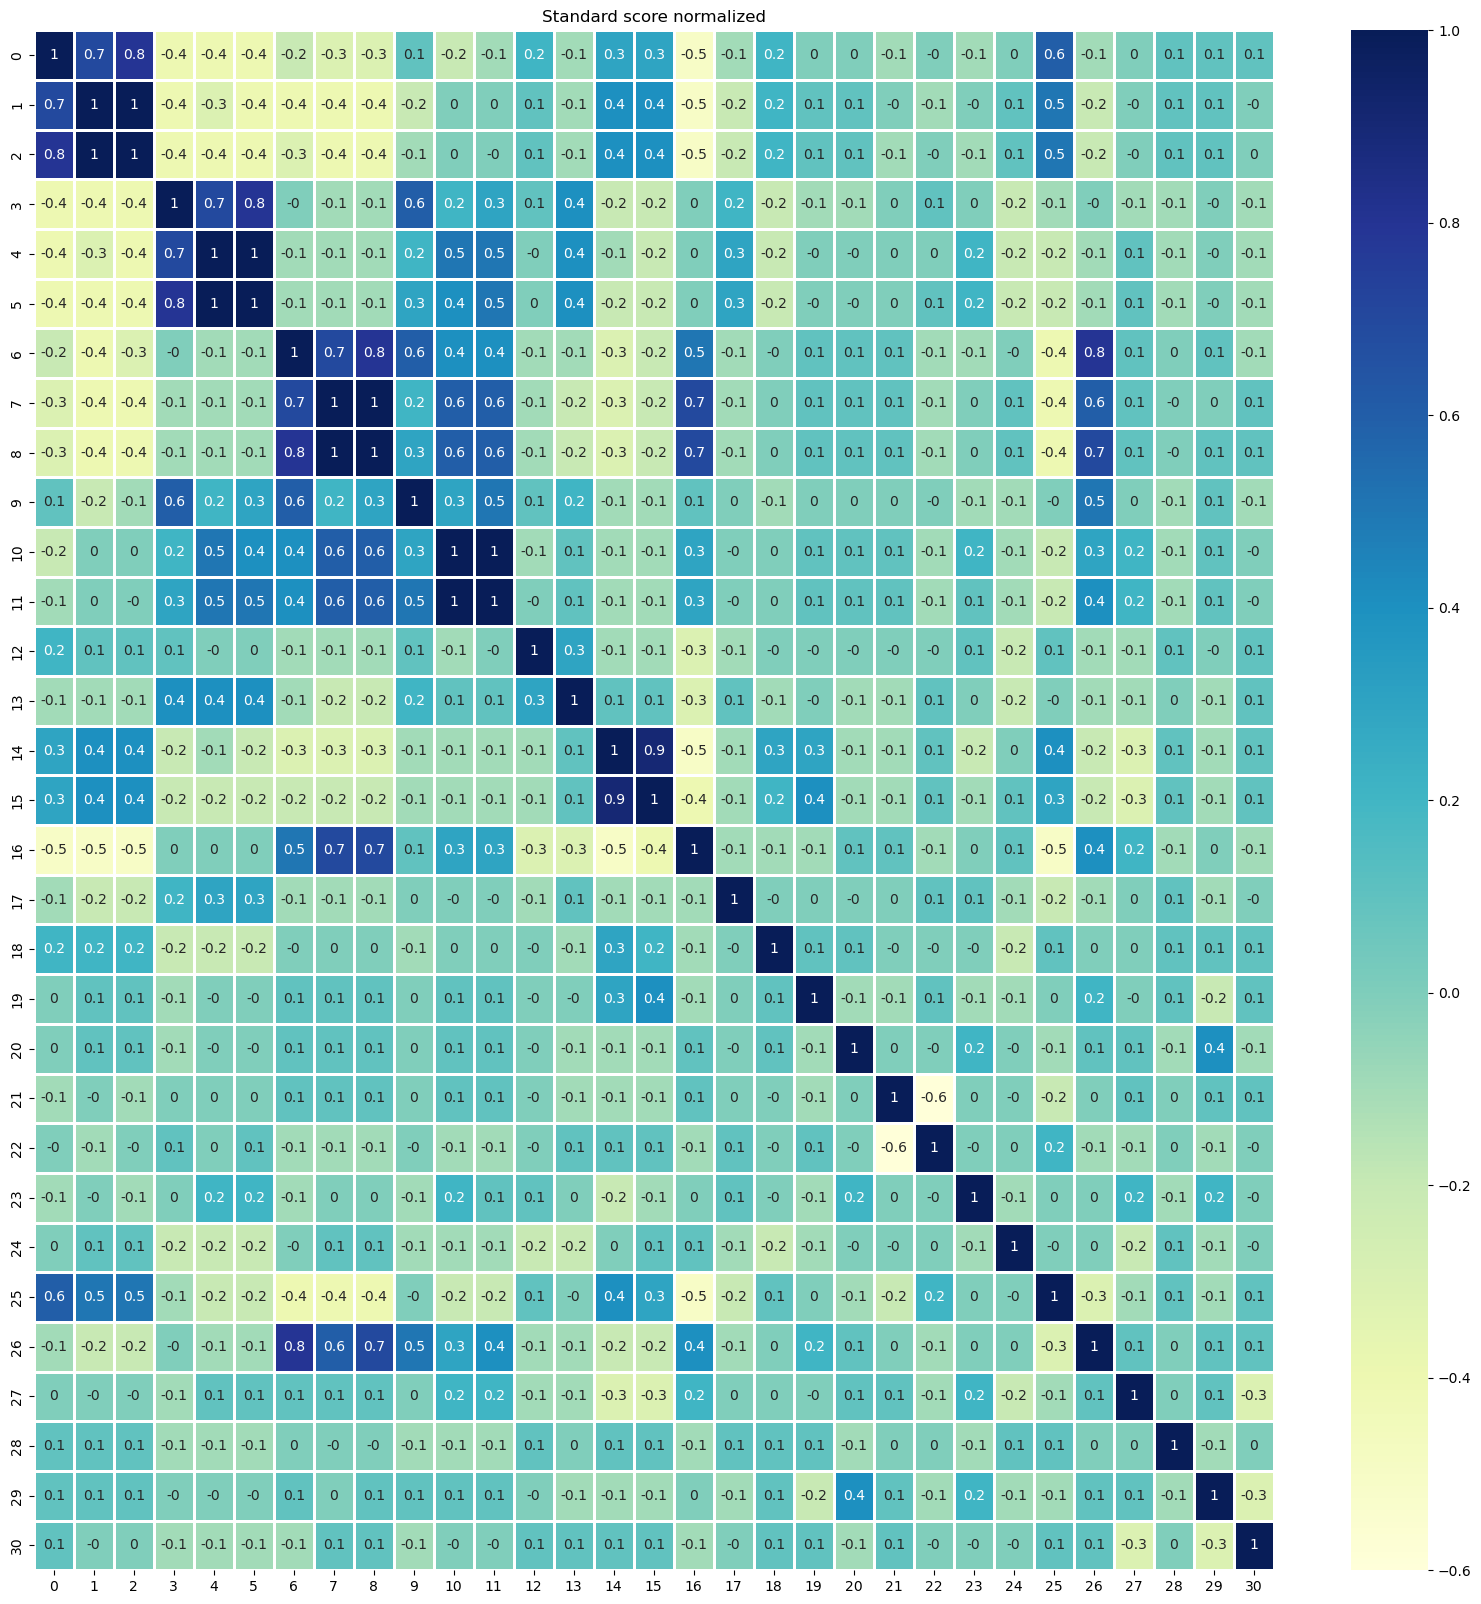

In [12]:
# 2. Standard score
X_standard_score = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
fig, ax = plt.subplots(figsize=(20,20))
plot_covariance(X_standard_score, "Standard score normalized")

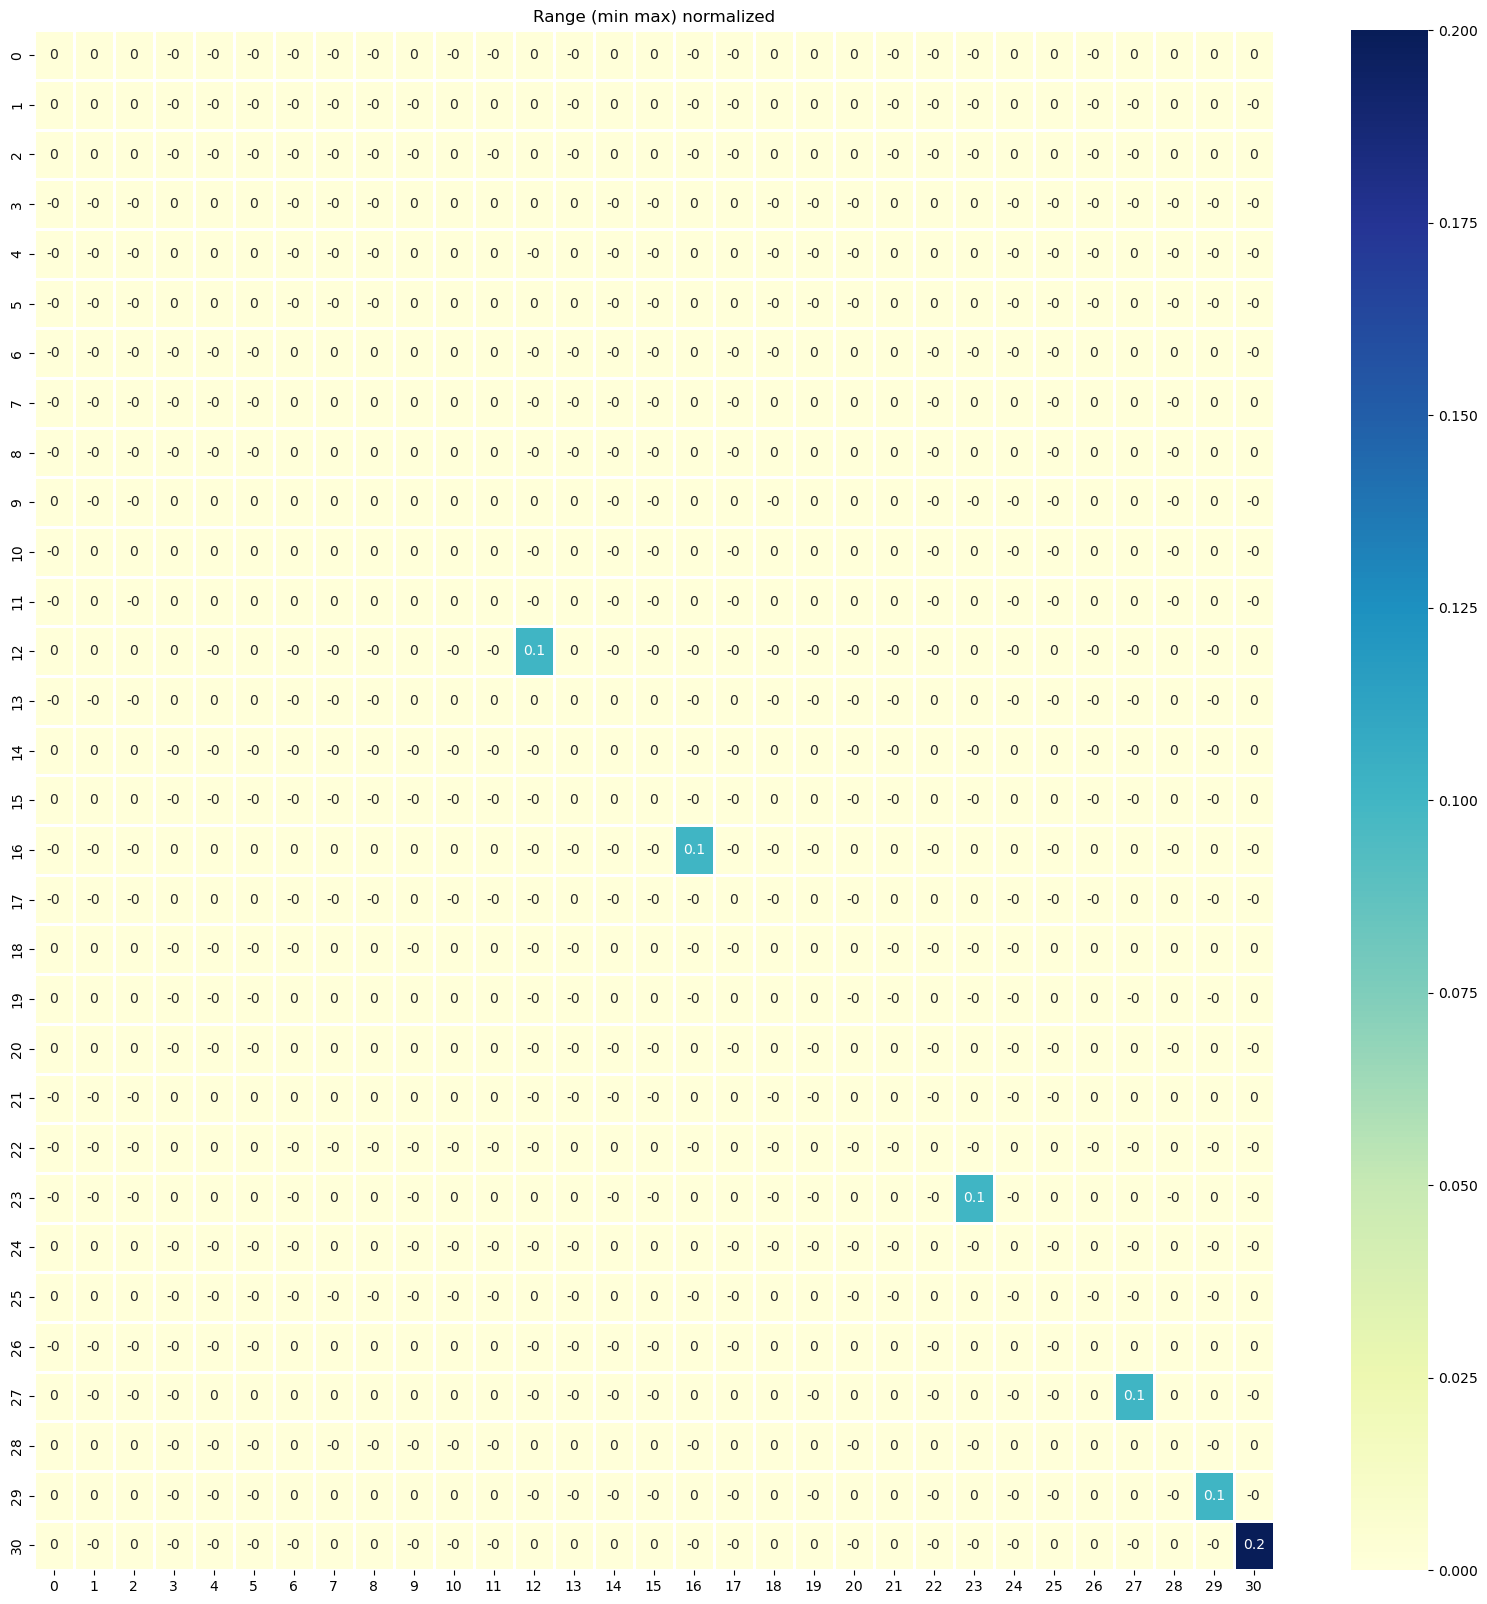

In [13]:
# 3. Range (min max)
X_range_min_max = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
fig, ax = plt.subplots(figsize=(20,20))
plot_covariance(X_range_min_max, "Range (min max) normalized")

### Task 2.1.4 (3 points)
<span style='color: green'>**\[Motivate\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [X] Standard score normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other within the matrix. 
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

*******************
Using standard score normalization we subtract the mean and divide by the corresponding variance. This essentially preserves the covariances but just puts them on a unit scale. Therefore, features are directly comparable within the matrix.

Using range normalization forces the features to lie between 1 and 0 in a way which doesn't preserve the covariance.
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [35]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np[:,2:].astype(float)

def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    n = len(x)
    mu = sum(x)/n
    var = sum([(xi - mu)**2 for xi in x]) / (n-1)
    sd = var**0.5
    
    l,r = min(x), max(x)
    b_size = (r - l) / b

    # F(a<x<=b) = F(b) - F(a)
    H_N = [norm.cdf(l + (i + 1) * b_size, mu, sd)  
               - norm.cdf(l + i * b_size, mu, sd) for i in range(b)]
    
    H_x = [0] * b
    for xi in x:
        b_idx = min(int(((xi - l) / b_size)//1), b - 1) # which bin
        H_x[b_idx] += 1/n 

    dist = sum([abs(H_N[i] - H_x[i]) for i in range(b)])
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
Some drawbacks that are immediately clear are that:\
$\qquad$    1. $\quad$ Just like you have to choose nr of clusters in k-means, you have to specify number of bins here\
$\qquad$    2. $\quad$ It is not very robust w.r.t. outliers\
$\qquad$    3. $\quad$ The implemented method can only be used on 1-dimensional data
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
As mentioned in A) it is not robust w.r.t. outliers. This is beacuse we use functions like min and max, and sample mean and -var.
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [36]:
b = 12
row, col = X.shape
dist_col = [0] * col
for j in range(col):
    dist_col[j] = norm_dist(X[:,j],b)

print(f"Min dist = col nr. {np.argmin(dist_col)},", f"\nMax dist = col nr. {np.argmax(dist_col)}")

Min dist = col nr. 3, 
Max dist = col nr. 30


<BarContainer object of 31 artists>

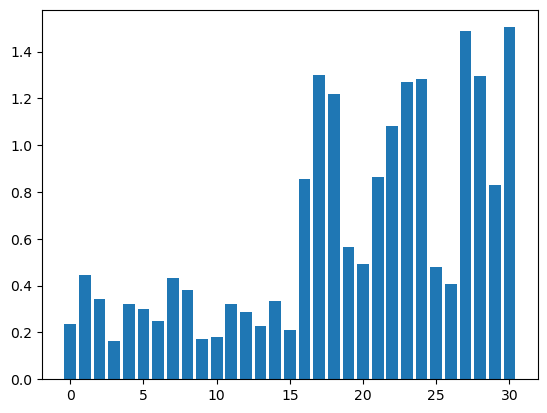

In [37]:
plt.bar(range(col),dist_col)

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

In [38]:
headers[30+2] # we cut the 2 text columns

'Artifact'

*******************
As seen in the above plot it is column 30, aka. 'Artifact', that has the largest distance from a normal distribution (with the current amount of bins). 
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the features follow a normal distribution?

*******************
Below I have plotted the two columns with min and max distance, respectively, and it's clear to see that while the former looks seemingly normal, the latter is most definently not.

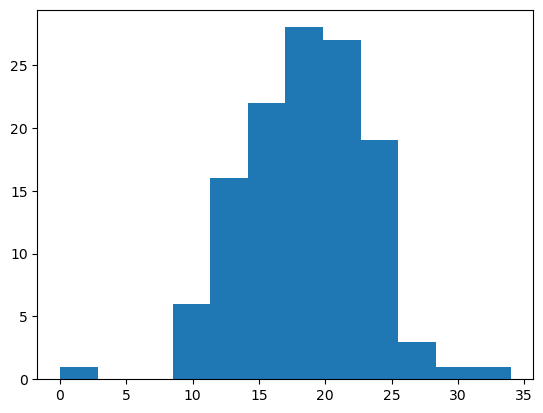

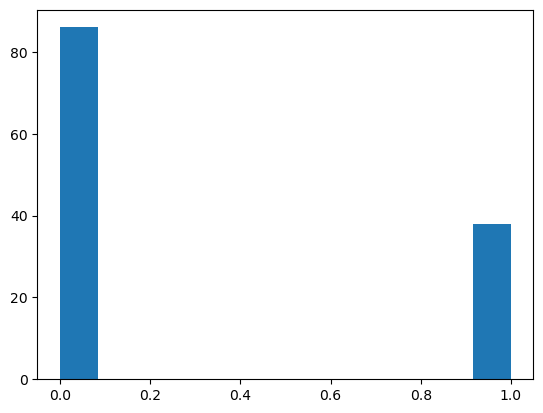

In [39]:
plt.hist(X[:,3],bins=12)
plt.show()
plt.hist(X[:,30],bins=12)
plt.show()

The min and max distance changes somewhat with the coice of number of bins, but it seem that some features, like 'AGI', are normaly distributed, while others are not.
******************

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Motivate\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

['HERO', 'A', 'STR', 'STR+', 'STR30', 'AGI', 'AGI+', 'AGI30', 'INT', 'INT+', 'INT30', 'T', 'T+', 'T30', 'MS', 'AR', 'DMG_MIN', 'DMG_MAX', 'RG', 'AS', 'BAT', 'ATK_PT', 'ATK_BS', 'VS-D', 'VS-N', 'TR', 'COL', 'HP/S', 'MP/S', 'Complexity', 'Legs', 'Release', 'Artifact'] (124, 31)


<Figure size 640x480 with 0 Axes>

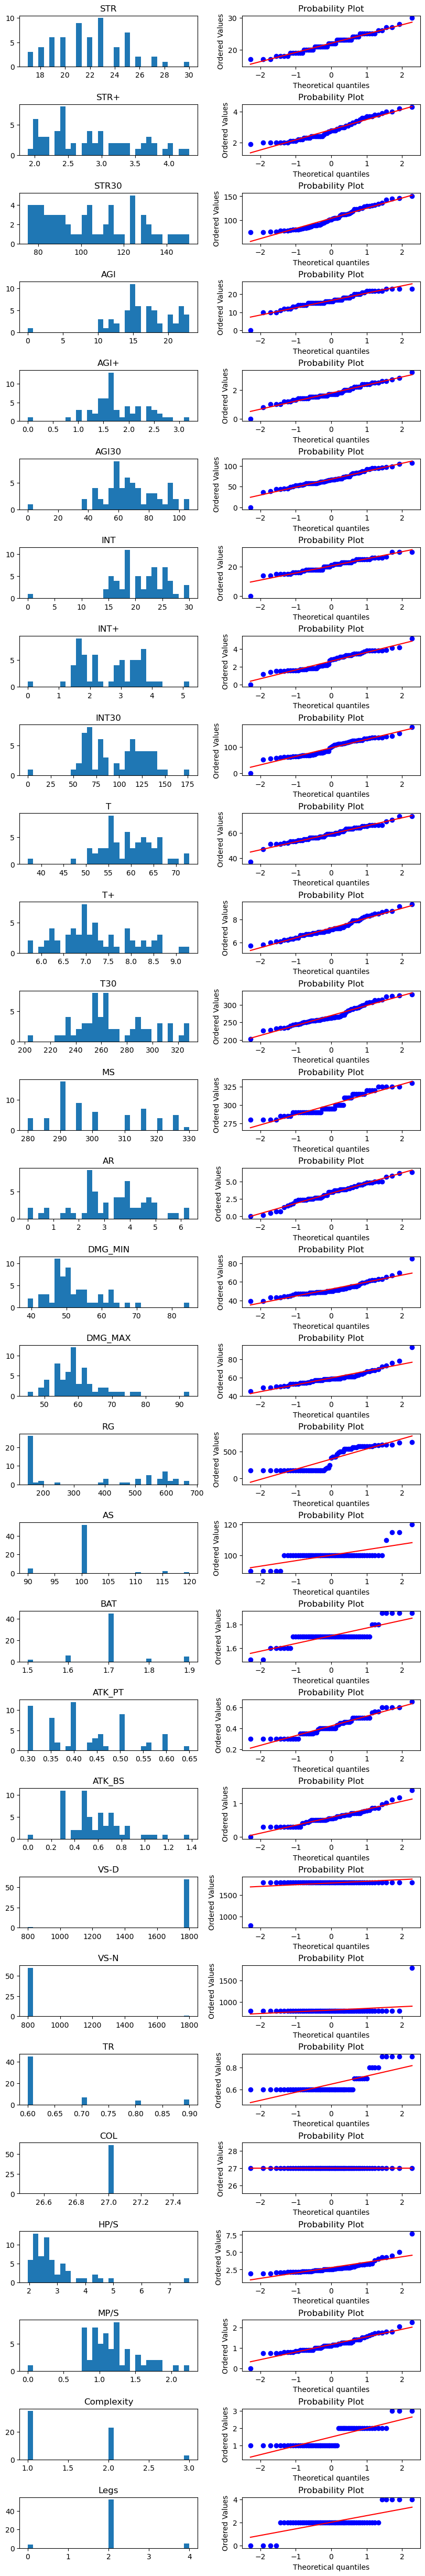

In [40]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape
print(headers, X.shape)
fig = plt.figure(constrained_layout=True, figsize=(8, 50))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(2,n):
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
This is a much better solution since we solve most of the the problems I mentioned in 2.2.2 A).\
$\qquad$    1. $\quad$ We don't have to make any assumptions, i.e chose nr of bins\
$\qquad$    2. $\quad$ It's more robust w.r.t. outliers. we don't have to consider them. \
$\qquad$    3. $\quad$ Something I hadn't considered above, but very importantly, it is very intuative and easier to use than the former method

As to why its is robust, it is because it is based on quantiles, which is a measure more robust to outliers compared to the functions mentioned in 2.2.2 A). Since it is rank based, the values of extreeme outliers don't affect the same way as it would a mean/variance. It is easy to visually tell if points are outliers when looking at the Q-Q plots
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. 

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [17]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()

In [18]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE

def silhouette_coefficients(X, labels, dist_fn=np.linalg.norm):

    K, counts = np.unique(labels, return_counts=True)
    clusters = [X[labels == i] for i in K]
    coefficients = []

    for x, x_k in zip(X, labels):

        int_x = np.sum(dist_fn(clusters[x_k] - x, axis= 1))/(counts[x_k] - 1) # compute int(x); substract 1 to exclude the point itself
        ext_x = min([np.mean(dist_fn(clusters[k] - x, axis= 1)) for k in K if k != x_k]) # compute ext for alle other clusters

        coefficients += [(ext_x - int_x) /(max(int_x, ext_x)) if counts[x_k] > 1 else 0 ]  # compute silhouette coefficient for each point
     
    return np.mean(coefficients) # return global silhouette coefficient 


max silhouette coefficient: 0.5, achieved with k = 3


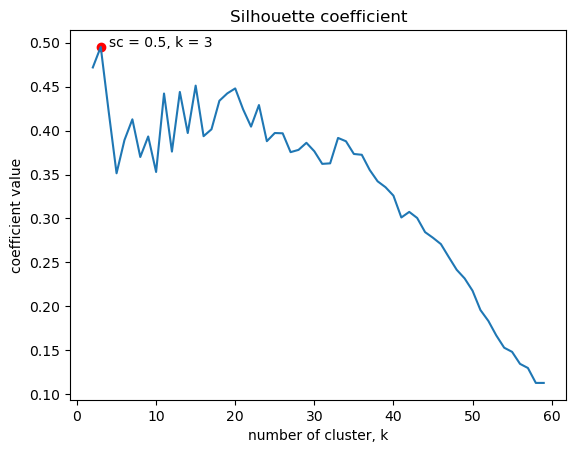

In [19]:
from sklearn.cluster import KMeans

sil_coef = []
sklean_coef = []

final_labels = []; max_coef = 0; max_k = 0

for k in range(2,60):

    # Run kmeans
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
    labels = kmeans.labels_

    # Compute silhouette coefficient
    coef = silhouette_coefficients(X, labels)

    # save clustering with highest silhouette coefficient
    if coef > max_coef:
        final_labels = labels
        max_k = k
        max_coef = coef

    sil_coef += [coef]


# Plot silhouette vs number of clusters, as well as clustering with highest silhouette coefficient
plt.plot(range(2,60), sil_coef)
plt.title("Silhouette coefficient")
plt.xlabel("number of cluster, k")
plt.ylabel("coefficient value")
plt.scatter(max_k, max_coef, c="red")
plt.annotate(f"sc = {round(max_coef, ndigits=2)}, k = {max_k}", (max_k+1, max_coef), )
print(f"max silhouette coefficient: {round(max_coef, ndigits=2)}, achieved with k = {max_k}")


B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
As seen in the plot above, when iterating through kmeans clustering with number of clusters variying from 2 to 60, the value of the silhouette coefficient peaks at k = 3 with a value of 0.49 - 0.5. 
However, the value of the silhouette coefficient is not necessarily significant. The silhouette coefficient takes values between -1 to 1, with 1 indicating a point is closer to members of its own cluster, and -1 meaning it is closer to members of another cluster. 
On average our clustering has value of approx 0.5, indicating a structure just on the verge between weak and medium.
******************

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

Text(0.5, 1.0, 'kmeans clustering with k = 3\n and silhouette coef. = 0.5')

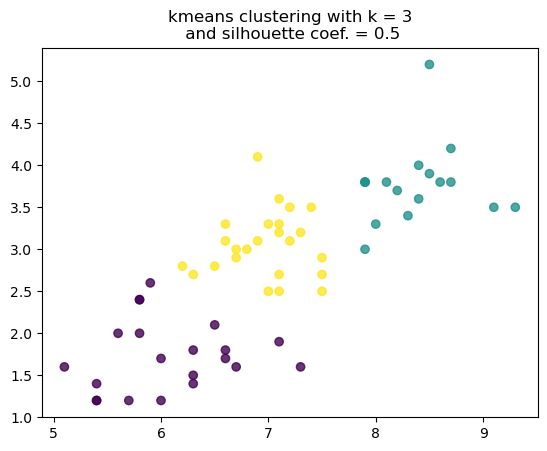

In [20]:
# Data
X = toy[[first, second]].to_numpy()


kmeans = KMeans(n_clusters=3, n_init="auto").fit(X)
labels = kmeans.labels_


plt.scatter(X[:,0], X[:,1], alpha=0.8, c=labels)
plt.title("kmeans clustering with k = " + str(max_k) + "\n and silhouette coef. = " + str(round(max_coef, ndigits= 2)))

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 

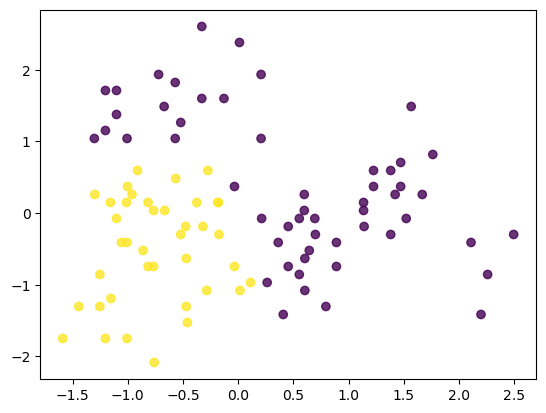

In [21]:
toy = df[df['A'].isin(['Strength', 'Intelligence', 'Universal'])]
first = "STR30"
second = "T+"
init=[[-1,-1],[1,2]]

X = toy[[first, second]].to_numpy()

# Data normalization
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.2): 
    k = np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))
    return k



def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, init=[[-1,-1],[1,2]], iters=100, error=0): 

    n, d = X.shape
    distances = np.zeros((n, n_clusters))

    if init is None:
        clusters = np.random.randint(n_clusters, size=(n))
    else:
        # Compute inital assignments
        for i in range(n_clusters):
            distances[:, i] = np.apply_along_axis(kernel, 1, X_norm, init[i])
        clusters = np.argmin(distances, axis=1)


    sqnorm = np.zeros(n_clusters)
    avg = np.zeros((n, n_clusters))
  
    for _ in range(iters):

        for i in range(n_clusters):
            cluster = X_norm[clusters == i]
            sqnorm[i] = np.mean([np.mean([kernel(a, b) for a in cluster]) for b in cluster])

            for j in range(n):
                avg[j, i] = np.mean([kernel(a, X_norm[j]) for a in cluster])
                distances[j, i] = sqnorm[i] - 2*avg[j, i]
            
        clusters = np.argmin(distances, axis=1)      
        
    return clusters

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
clusters = kernel_kmeans(X_scaled, 2)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)

### Task 3.1.4 (1 points)
<span style='color: green'>**\[Motivate\]**</span> Run both kmeans and kernel K-means on data. (with a given init)
which method is better at isolating universal classified heroes and why?

In [22]:
init=[[-1,-1],[1,2]]
kmeans = KMeans(n_clusters=2,init=init).fit(X_norm)
# plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=kmeans.labels_)

Text(0.5, 1.0, 'ground truth')

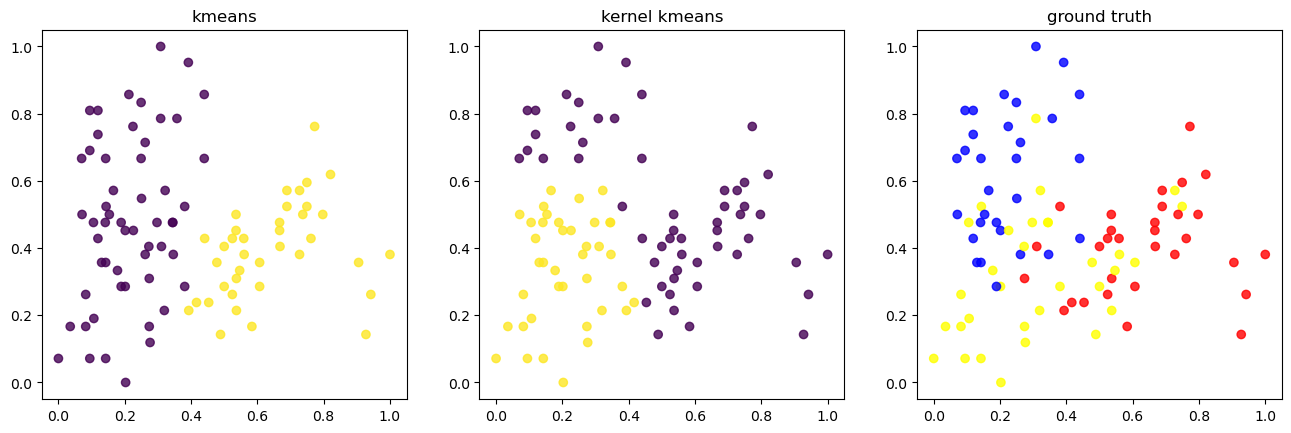

In [23]:
clusters = kernel_kmeans(X_norm, 2, init=init)
# plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(16)
ax1.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=kmeans.labels_)
ax1.set_title("kmeans")
ax2.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)
ax2.set_title("kernel kmeans")
ax3.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=toy['A'].map(color_map))
ax3.set_title("ground truth")

*******************
The kernel kmeans seems to be performing better, grouping the two other classes together, whilst normal kmeans doens't seem to be able to do this. K-means considers boundaries to be linear, and by using a kernel to map the data points to af different space, kernel kmeans can circumvent this limitation.
******************


## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$, where $p_{C_i}= \frac{|C_i|}{n}$

The **Conditional Entropy** of $T$ **given** $C$ is given by: 
$$\text{CE}(T|C)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

In [24]:
def entropy(C):
    # Let C be a list of clusters
    n = len(C)
    _, counts = np.unique(C, return_counts=True)
    return -np.sum([(c/n)*np.log(c/n) for c in counts if c > 0])


def CE(C, T):
    n = len(T)
    _, C1k, C1  = np.unique(T, return_inverse=True, return_index=True)
    _, C2k, C2 = np.unique(C, return_inverse=True, return_index=True)

    table = np.zeros((len(C2k), len(C1k)))
    ce = 0

    for i, j in zip(C2, C1):
        table[i, j] += 1
    
    for row in table:
        n_row = np.sum(row)
        ce += np.sum([(r/n)*np.log(r/n_row) for r in row if r > 0])
    
    return -ce


### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Print the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. <br>

conditional entropy is 0.32, and true class entropy is 0.69


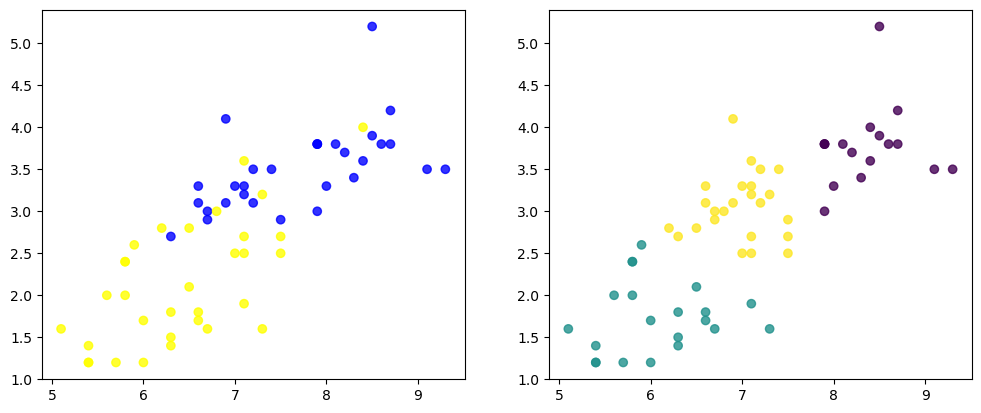

In [25]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()

kmeans = KMeans(n_clusters=3, n_init="auto").fit(X)
labels = kmeans.labels_

class_labels = np.array(toy["A"])

print(f"conditional entropy is {round(CE(labels, class_labels), ndigits=2)}, and true class entropy is {round(entropy(class_labels), ndigits=2)}")

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)
ax1.scatter(X[:,0], X[:,1], alpha=0.8, c=toy['A'].map(color_map))
ax2.scatter(X[:,0], X[:,1], alpha=0.8, c=labels)

<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 

Even though the true clustering only consists of two classes, more clusters (in this case three) of a smaller size seem to result in a smaller conditional entropy. This might be due to the conditional entropy measure favoring having a few clusters with a higher agreement of assignment with the true classes (ie, more 'pure') and a few clusters with a large overlapping assignment between classes, rather than having multiple clusters with a equal amount of overlapping in each. 

As shown in the figure above, we have two clusters that have little overlap with different classes, whilst the middle clustering contains a mixture of classes. This clustering gives a smaller conditional entropy compared to using kmeans with two clusters, where both clusters then have overlapping classes.

******************

<span style='color: green'>**\[Motivate\]**</span><br>
B) What does the measure capture? 

*******************
Conditional entropy captures how much 'disorder' a clustering has. If the clustering matches the true classes entirely, the entropy is zero. If the clustering is completely random (T and C are independent), ie. brings no information of the classes, the conditional entropy is the same value as the entropy of the true clustering (or log(k))
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [26]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()
T = np.array(toy["A"]) # Ground-truth clusters

kmeans = KMeans(n_clusters=3, n_init="auto").fit(X)
C = kmeans.labels_ # Clusters obtained by k-means

## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = 0

    n = len(T)
    _, C_k, C  = np.unique(C, return_inverse=True, return_index=True)
    _, T_k, T = np.unique(T, return_inverse=True, return_index=True)

    table = np.zeros((len(C_k), len(T_k)))

    for i, j in zip(C, T):
        table[i, j] += 1
    
    for row in table:
        purity += max(row)
    
    return purity/n

print('Purity: {}, CE: {}'.format(purity(C,T), CE(C,T)))

Purity: 0.8225806451612904, CE: 0.331709003460238


### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Print the purity of the clusters obtained by k-means in Task 3.1.1. 


In [27]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()

T = np.array(toy["A"]) # Ground-truth clusters

kmeans = KMeans(n_clusters=3, n_init="auto").fit(X)
C = kmeans.labels_ # Clusters obtained by k-means

print(f'Purity: {round(purity(C,T), ndigits=2)}, CE: {round(CE(C,T), ndigits=2)}')

Purity: 0.82, CE: 0.33


B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [X] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
Conditional entropy is preferable because information from all data points is taken into account, and not just the largest class within each cluster; purity does not consider the distribution of other classes within the cluster as CE does.

By using all points CE is also less sensitive to imbalences in class and cluster sizes.

******************

## Task 3.3 Gaussian Mixtures and the EM-Algorithm
### Task 3.3.1 (6 point)
<span style='color: green'>**\[Implement\]**</span> the EM-algorithm for the Gaussian Mixture Model.
<br> You can consult [DMA] Section 13.3.2, for a description of how the algorithm works in this particular setup.

In [28]:
from utilities.gmm import GMM
from scipy.stats import multivariate_normal
class MyGMM(GMM):
    def initialize_parameters(self, X):
        """
            This function should utilize information from the data to initialize
            the parameters of the model.
            In particular, it should compute initial values for mu, Sigma, and pi.
            
            The function corresponds to line 2-4 in Algorithm 13.3 in [DMA, p. 349]
            Note, that K can be retrieved as `self.K`.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size     [K, d, d]
                    pi has size        [K]
        """
        n, d = X.shape

        # Get range of X and initialize random mu (uniformly) for each cluster
        X_min, X_max = (np.min(X, axis=0), np.max(X, axis=0))        
        self.mu = np.stack([np.random.uniform(X_min[i], X_max[i], self.K) for i in range(d)],  axis=-1)

        # initialize K identity matrices        
        self.Sigma = np.stack([np.identity(d)]*self.K)

        # Equal probability for simplicity.
        self.pi = np.ones((self.K,)) / self.K 

        return self.mu, self.Sigma, self.pi 


    def posterior(self, X):
        """
            The E-step of the EM algorithm. 
            Returns the posterior probability p(Y|X)

            This function corresponds to line 8 in Algorithm 13.3 in [DMA, p. 349]
            Note, that mean and covariance matrices can be accessed by `self.mu` and `self.Sigma`, respectively.
            
            Args:
                X (matrix, [n,  d]): Data to compute posterior for.

            Returns:
                Matrix of size        [n, K]
        """

        probs_pi = np.stack([self.prob(X, self.mu[i], self.Sigma[i])*self.pi[i] for i in range(self.K)], axis=1)
        sum_probs_pi = np.sum(probs_pi, axis=1)

        return probs_pi / sum_probs_pi[:, np.newaxis]
    
    
    def prob(self, X, mu, sigma):
        mvn = multivariate_normal(mean=mu, cov=sigma)
        return mvn.pdf(X)


    def m_step(self, X, P):
        """
            Update the estimates of mu, Sigma, and pi, given the data `X` and the current
            posterior probabilities `P`.

            This function corresponds to line 10-12 in Algorithm 13.3 and Eqn. (13.11-13) in [DMA, p. 349].
            
            Args:
                X (matrix, [n, d]): Data matrix
                P (matrix, [n, K]): The posterior probabilities for the n samples.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        n, _ = X.shape 

        P_sum = np.sum(P, axis=0)[:, np.newaxis]
        
        mu_hat = np.einsum('nk,nd->kd', P, X)/P_sum

        mean_diff = X - mu_hat[:, np.newaxis]
        Si_hat = np.einsum('nk,knd,knp->kdp', P, mean_diff, mean_diff)/P_sum[:,np.newaxis]

        pi_hat = P_sum/n

        return  mu_hat, Si_hat, pi_hat



### Task 3.3.2 (2 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run your EM-algorithm for GaussianMixtures<br> 

Purity: 0.92, conditional entropy: 0.27


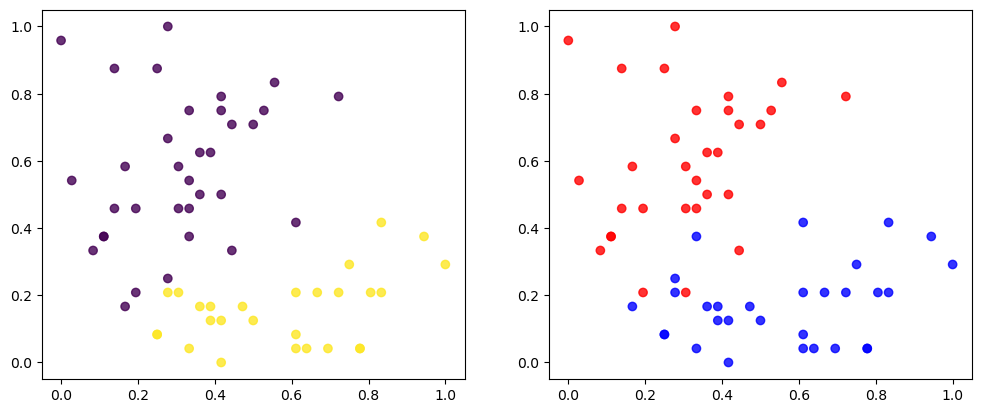

In [29]:
toy = df[df['A'].isin(['Intelligence', 'Strength'])]
first = "T+"
second = "STR+"

labels = toy[['A']].to_numpy()
labels = np.unique(labels, return_inverse=True)[1]
X = toy[[first, second]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

gmm = MyGMM(2)
gmm.fit(X_norm, max_iter=1000)
clusters = gmm.predict(X_norm)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)
ax1.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)
ax2.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=toy['A'].map(color_map))

print(f"Purity: {round(purity(clusters, labels), ndigits=2)}, conditional entropy: {round(CE(clusters, labels), ndigits=2)}")

<span style='color: green'>**\[Motivate\]**</span><br>
B) What are the advantages and disadvantages of this approach?<br> 

*******************
EM does not do a hard assignment of points, but provides a probability of a point belonging to a cluster, which can better capture uncertainty of assignment/the uncertainty of the data.

Moreover, due to EM being probabilistic, and not bases on hard assignment, it is less sensitive to outliers and can better handle overlapping clusters.

******************

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [41]:
toy = df[df['A'].isin(['Intelligence', 'Strength'])]
first = "T+"
second = "STR+"
X = toy[[first, second]].to_numpy()

X_norm = (X - X.min(0)) / X.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [42]:
from math import dist

def DBOutliers(X, eps, pi): 
    outliers = []
    ### YOUR STARTS CODE HERE (MY CODE STARTS HERE, haha)
    
    n = len(X)
    d = n-1
    for i, p in enumerate(X):
        counter = 0
        for j, x in enumerate(X):
            if i != j:
                if dist(p,x) < eps:
                    counter += 1
        if counter/d <= pi:
            outliers.append(p)      
    
    ### YOUR CODE ENDS HERE
    return np.array(outliers) 

### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

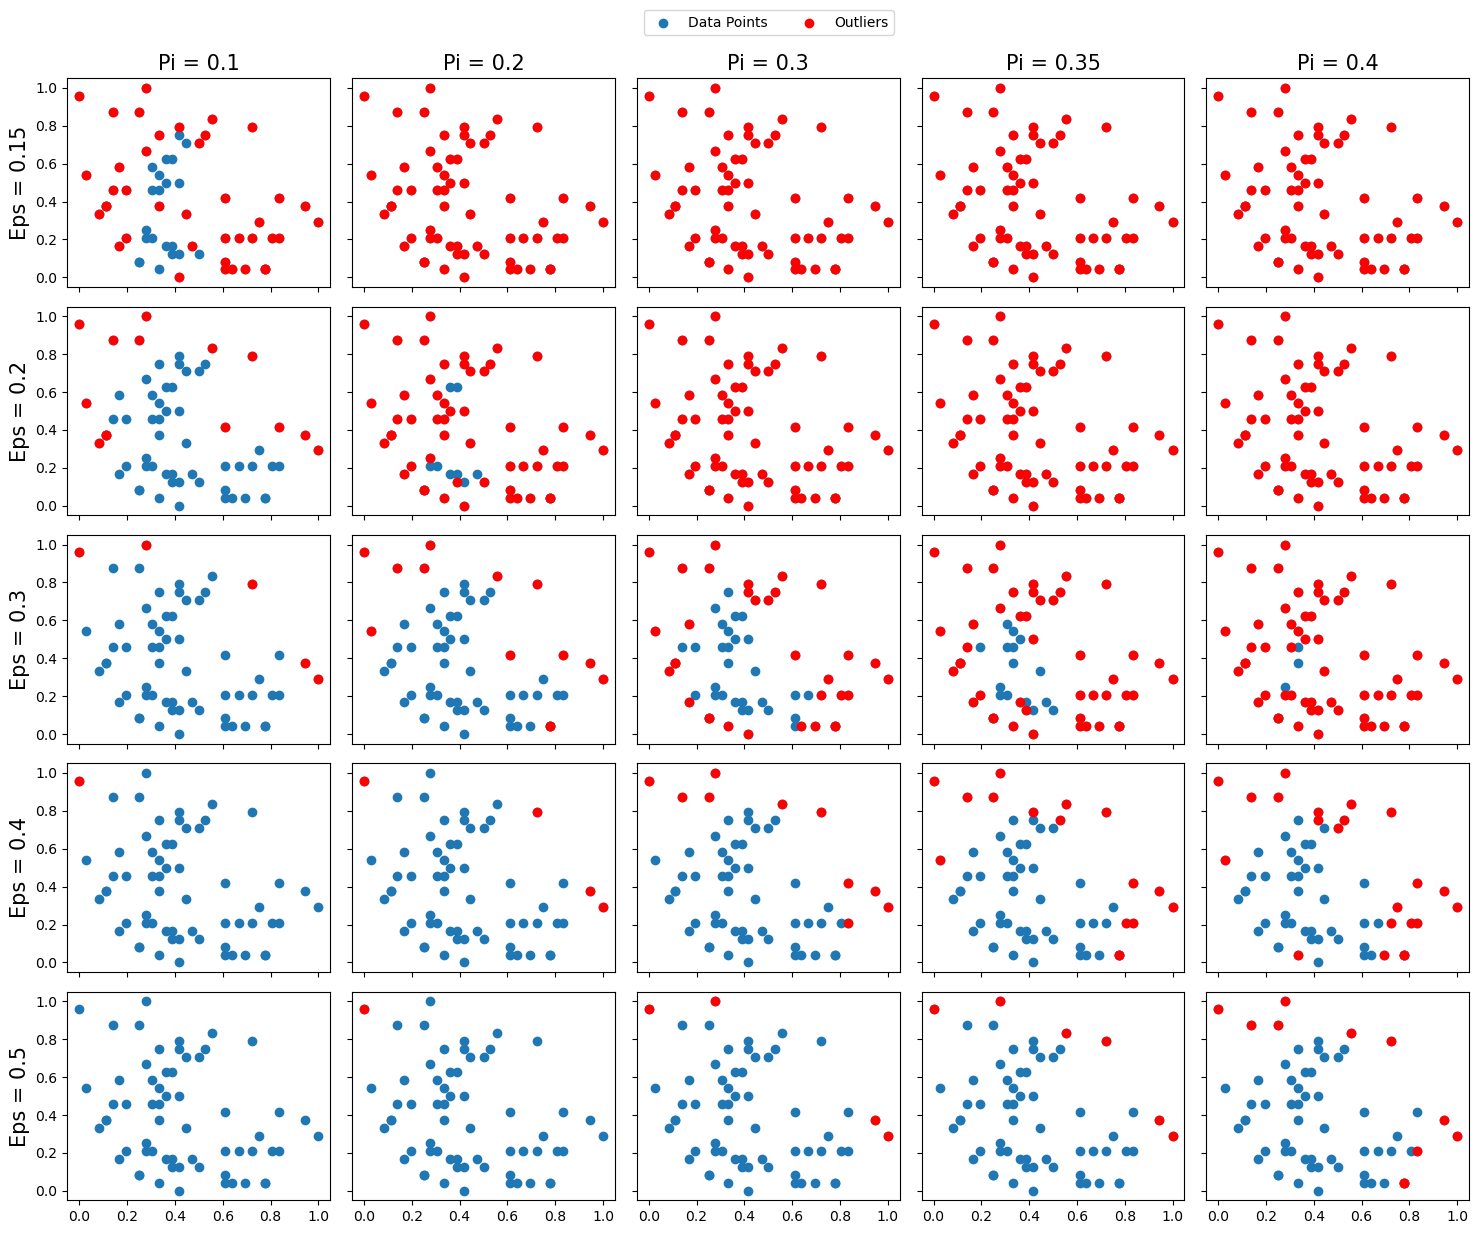

In [43]:
### YOUR CODE HERE
eps_range = [0.15, 0.2, 0.3 , 0.4, 0.5]
pi_range  = [0.1, 0.2, 0.3, 0.35, 0.4] 

# Plot w subplots.
fig, axes = plt.subplots(len(eps_range), len(pi_range), figsize=(15, 12), sharex=True, sharey=True)

for i, eps in enumerate(eps_range):
    for j, pi in enumerate(pi_range):
        
        out = DBOutliers(X_norm, eps, pi)
        
        ax = axes[i, j]
        ax.scatter(X_norm[:, 0], X_norm[:, 1], label='Data Points')
        if out.any(): # If it's not empty
            ax.scatter(out[:, 0], out[:, 1], color='red', label='Outliers')
        
        # Titles for the two ranges:
        if i == 0:
            ax.set_title(f"Pi = {pi}", fontsize=15)
        if j == 0:
            ax.set_ylabel(f"Eps = {eps}", fontsize=15)



# legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.61, 1.03), ncol=2)

plt.tight_layout()
plt.show()
### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
In the above grid-plot you can see how different choices og $\epsilon$ and $\pi$ lead to different groupings of outliers (red points).

It is easy to see that you have to carefully choose both $\epsilon$ and $\pi$:

(1)\
$\epsilon$ determins the minimum distance threshold for when points are considered to be "close" to oneanother. For low $\epsilon$ we see that most points are classified as outliers regardless of $\pi$. Equally large $\epsilon$ lead to few outliers.

(2)\
$\pi$ controls the proportion of observations that have to be "close" to a point. If at most $\pi\times100\%$ are within $\epsilon$, then it can be considered an outlier. As such, we see that a low $\pi$ results in fewer outliers while the opposite is true for larger $\pi$
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

In [44]:
def tune_dboutliers(X, p=0.1, step_size = 0.02): 
    eps = 0.1
    pi = 0.9
    ### YOUR STARTS CODE HERE (haha)
    n = len(X)
    out_n = int((n * p) //1)
    
    while pi > 0:
        if len(DBOutliers(X, eps, pi)) == out_n:
            return eps, pi
        pi -= step_size
        while eps < 1:
            if len(DBOutliers(X, eps, pi)) == out_n:
                return eps, pi
            eps += step_size
        eps = 0.1    
    ### YOUR ENDS CODE HERE (haha x 2)
    return None

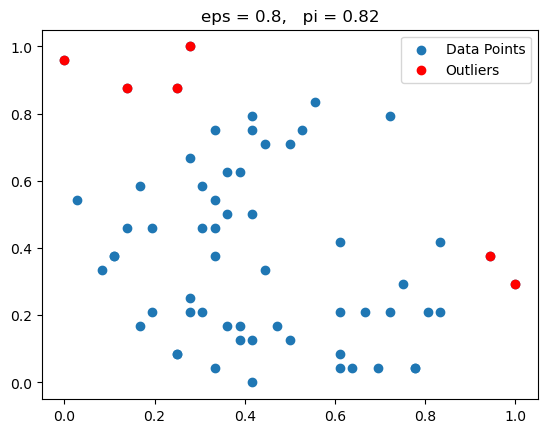

In [45]:
eps, pi = tune_dboutliers(X_norm)

out = DBOutliers(X_norm, eps, pi)

fig, ax = plt.subplots()
ax.scatter(X_norm[:, 0], X_norm[:, 1], label='Data Points')
if out.any(): # If it's not empty
    ax.scatter(out[:, 0], out[:, 1], color='red', label='Outliers')
plt.title(f"eps = {eps:.2},   pi = {pi:.2}")
plt.legend()
plt.show()

B) <span style='color: green'>**\[Motivate\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
It is difficult to determine the amount of outliers that "should" occur, as it depends a lot on the data; how it was colected an from which distribution, etc. 

So I have chosen an  arbitrary amount, 10%, to be the "normal amount" of outliers.

Essencially it just determines how many points are equavalent to $p\%$ of the dataset (in this case $10\% = 6$). Then it basically performs a "grid search" with various values of $\epsilon$ and $\pi$ until DBOutliers finds it's first match where the number of outliers are equal to $p\%$

The algorithem is very simple and brute force, which is a drawback.

First of all you still need to choose a reasonble $p$, so it is not nonparametric. Secondly it is bruteforce, and thus very slow. Does not scale well with large data and small step_size. 

More importantly it is not guarenteed to give a good result. The algorithm cycles through values of $\epsilon$ first and then values of $\pi$, meaning the solution is always going to be one with high $\pi$. Had i done it the other way it would have likely resulted in a diferent set of outliers.  

I belive a chose a reasonable starting value for both $\epsilon$ and $\pi$, but a diffent initialization of those values would likely also have lead to a different outcome.

Finally I have made the assumtion that the data is normalized like the one I have been dealing with. Otherwise you would need to choose a different way of initializing $\epsilon$ so as to choose an apropriate value
*******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Motivate\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

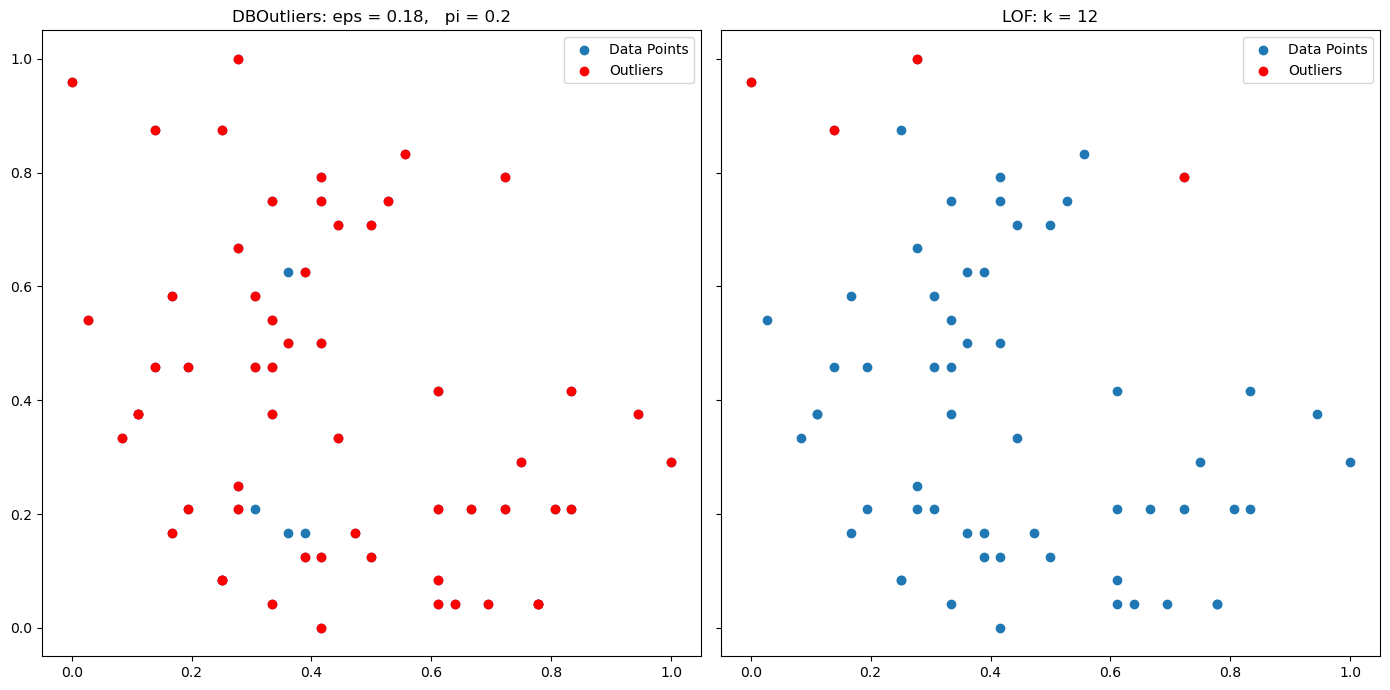

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

out = DBOutliers(X_norm, 0.18, 0.2)

ax = axes[0]
ax.scatter(X_norm[:, 0], X_norm[:, 1], label='Data Points')
if out.any(): # If it's not empty
    ax.scatter(out[:, 0], out[:, 1], color='red', label='Outliers')
ax.set_title(f"DBOutliers: eps = 0.18,   pi = 0.2")
ax.legend()

#### Code from week 9 Excersises #####
# 4. LOF for highlighted objects
X = X_norm #dataset

#Points for testing LOF
p1 = [1., 5.] 
p2 = [8., 1.]

#nymber of knn
k  = int((0.2*len(X))//1) # To make it compareble we choose k based on pi

#empty lists for neighborhood and k-distances
neighborhoods  = []
kdists         = []

#number of points
n = np.arange(X.shape[0])

# Find neighbors and kdists
for i, x in enumerate(X): #for each point i
    d = np.zeros_like(n, dtype=float) #list of all distances
    for j, x_ in enumerate(X): #for each point j
        d[j] = np.linalg.norm((x-x_), ord=1) #compute manhattan distance
    args = np.argsort(d) #descending order
    ns = n[args] #order ids by distance order
    ds = d[args] #order distances

    kdist =  ds[k-1] #kth-distance
    kdists.append(kdist) #append the kth-distance
    neighborhoods.append(ns[ds <= kdist]) #add all "neighbors" with distance at most distk (maybe more than k)

# Compute lrds
reach_dist = lambda i, j: max(kdists[j], np.linalg.norm(X[i]-X[j], ord=1)) 
lrds = []
for i, x in enumerate(X):
    lrd = 0
    for j in neighborhoods[i]:
        lrd += reach_dist(i, j)
    lrd /= len(neighborhoods[i])-1
    lrd = 1 / lrd
    lrds.append(lrd)

def LOF(i):
    lof = np.sum([lrds[j] for j in neighborhoods[i]])/len(neighborhoods[i])
    return lof / lrds[i]

lofs = [LOF(i)> 1.30 for i in range(len(X))]

ax = axes[1]
ax.scatter(X[:,0],X[:,1], label='Data Points')
ax.scatter(X[lofs,0],X[lofs,1], color='red', label='Outliers')
ax.set_title(f"LOF: k = {k}")
ax.legend()

plt.tight_layout()
plt.show()

*******************
The amount of outliers we get with these parameters are absurd. The comparison is like night and day. In the case of DBOutliers $\epsilon$ is too little and consequently most points are marked as outliers. In contrast, LOF provides a more balanced outcome with only three outliers identified. LOF is able to more effectively distinguish between normal data points and outliers, considering both local and global characteristics of the data. More than anything this  underscores the importance of selecting an appropriate outlier detection algorithm and reasonable parameter settings in order to achieve meaningful results.
******************